# Qualitätssicherung durch Unit Tests

## Vorbereitung

Vor der Ausführung der detaillierten Analyse werden automatisierte Tests durchgeführt, um die Zuverlässigkeit aller Analysefunktionen sicherzustellen.

In [14]:
# Führe Unit Tests für detaillierte EDA-Utilities aus
import subprocess
import sys

print("🧪 Qualitätssicherung: Unit Tests für detaillierte EDA-Funktionen")
print("=" * 70)

try:
    result = subprocess.run([sys.executable, '-m', 'pytest', 'test_utils_analyse_einzelne_abstimmungen.py', '-v'], 
                          capture_output=True, text=True, cwd='.')
    
    if result.returncode == 0:
        print("✅ Alle Tests erfolgreich bestanden!")
        print("\n📈 Test-Zusammenfassung:")
        # Zeige nur die wichtigsten Zeilen der Ausgabe
        lines = result.stdout.split('\n')
        for line in lines:
            if 'passed' in line or 'PASSED' in line or 'failed' in line or 'FAILED' in line:
                print(f"   {line}")
    else:
        print("❌ Einige Tests sind fehlgeschlagen:")
        print(result.stderr)
        print("\n📤 Detaillierte Ausgabe:")
        print(result.stdout)
except Exception as e:
    print(f"⚠️ Fehler beim Ausführen der Tests: {e}")
    print("Tests werden übersprungen, Analyse kann trotzdem fortgesetzt werden.")

print("\n" + "=" * 70)
print("🚀 Bereit für die detaillierte Analyse!")
print("=" * 70)

🧪 Qualitätssicherung: Unit Tests für detaillierte EDA-Funktionen
✅ Alle Tests erfolgreich bestanden!

📈 Test-Zusammenfassung:
   test_utils_analyse_einzelne_abstimmungen.py::TestBasicUtilityFunctions::test_create_canton_mapping PASSED [ 20%]
   test_utils_analyse_einzelne_abstimmungen.py::TestBasicUtilityFunctions::test_create_color_scheme PASSED [ 40%]
   test_utils_analyse_einzelne_abstimmungen.py::TestBasicUtilityFunctions::test_filter_for_abstimmung PASSED [ 60%]
   test_utils_analyse_einzelne_abstimmungen.py::TestBasicUtilityFunctions::test_search_voting_by_title PASSED [ 80%]
   test_utils_analyse_einzelne_abstimmungen.py::TestIntegrationWithRealData::test_real_data_workflow PASSED [100%]
   ============================== 5 passed in 1.59s ==============================

🚀 Bereit für die detaillierte Analyse!
✅ Alle Tests erfolgreich bestanden!

📈 Test-Zusammenfassung:
   test_utils_analyse_einzelne_abstimmungen.py::TestBasicUtilityFunctions::test_create_canton_mapping PASSED [ 2

# Detaillierte Analyse gesellschaftsorientierter Abstimmungen

## Zielsetzung und Methodik

Dieses Notebook führt eine vertiefte Analyse gesellschaftsorientierter Abstimmungen in der Schweiz durch. Basierend auf einer verfeinerten Klassifikationsmethodik werden folgende Aspekte untersucht:

### Forschungsfragen
1. **Klassifikationsgenauigkeit**: Wie präzise ist die automatische Identifikation gesellschaftsorientierter Abstimmungen?
2. **Kantonale Liberalität**: Welche Kantone zeigen systematisch höhere Akzeptanz für gesellschaftliche Reformen?
3. **Zeitliche Entwicklung**: Wie haben sich die Einstellungen zu gesellschaftlichen Themen entwickelt?
4. **Regionale Muster**: Gibt es kulturelle oder sprachregionale Unterschiede?

### Methodische Verbesserungen
- **Erweiterte Keyword-Analyse**: Differenzierte Schlüsselwörter mit Ausschlusskriterien
- **Validierungsstichproben**: Manuelle Überprüfung der automatischen Klassifikation
- **Statistische Robustheit**: Mehrfache Validierung der Ergebnisse
- **Visualisierungsvielfalt**: Verschiedene Darstellungsformen für unterschiedliche Erkenntnisse

### Datengrundlage
Der Datensatz umfasst alle eidgenössischen Abstimmungen seit 1860 mit detaillierten Ergebnissen auf Kantons- und Gemeindeebene.

## Import der spezialisierten Bibliotheken

Für die detaillierte Analyse werden zusätzliche spezialisierte Tools benötigt:
- **pandas**: Erweiterte Datenmanipulation und -analyse
- **matplotlib/seaborn**: Hochwertige statistische Visualisierungen
- **scipy.stats**: Statistische Tests und Korrelationsanalysen
- **numpy**: Numerische Berechnungen und Array-Operationen
- **utils_detailliertes_eda**: Benutzerdefinierte Analysefunktionen mit Unit Tests

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import sys
import warnings
warnings.filterwarnings('ignore')

# Importiere spezialisierte Analysefunktionen
from utils_analyse_detailliert import (
    load_society_data,
    define_social_keywords,
    classify_society_votes,
    calculate_canton_liberality_ranking,
    plot_canton_liberality_ranking,
    analyze_temporal_patterns,
    create_temporal_visualization,
    validate_classification_sample,
    generate_summary_statistics
)

# Konfiguriere Visualisierungseinstellungen
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 11

print("✅ Alle Bibliotheken erfolgreich importiert")
print("📈 Visualisierungseinstellungen konfiguriert")

✅ Alle Bibliotheken erfolgreich importiert
📈 Visualisierungseinstellungen konfiguriert


## Datensatz vorbereiten

In [16]:
# Lade den Datensatz
df = pd.read_csv('./data/dataset.csv', sep=';', low_memory=False)

# Konvertiere Datumsspalte in datetime-Format
df['datum'] = pd.to_datetime(df['datum'], format='%d.%m.%Y', errors='coerce')
df['year'] = df['datum'].dt.year

# Funktion zur Datensatzübersicht
def get_dataset_overview(df: pd.DataFrame) -> dict:
    """Erstellt eine Übersicht über den Datensatz."""
    return {
        'total_rows': len(df),
        'total_columns': len(df.columns),
        'memory_usage': df.memory_usage(deep=True).sum() / 1024**2,  # MB
        'missing_values': df.isnull().sum().sum(),
        'date_range': (df['datum'].min(), df['datum'].max()) if 'datum' in df.columns else ('N/A', 'N/A')
    }

# Datensatzübersicht
overview = get_dataset_overview(df)
print(f"Datensatzübersicht:")
print(f"   Zeilen: {overview['total_rows']:,}")
print(f"   Spalten: {overview['total_columns']:,}")
print(f"   Speicherverbrauch: {overview['memory_usage']:.1f} MB")
print(f"   Fehlende Werte: {overview['missing_values']:,}")
print(f"   Zeitraum: {overview['date_range'][0]} bis {overview['date_range'][1]}")

# Konvertiere Datum zu datetime
if 'datum' in df.columns:
    df['datum'] = pd.to_datetime(df['datum'], errors='coerce')
    df['year'] = df['datum'].dt.year
    print(f"   Gültige Jahreswerte: {df['year'].notna().sum():,}")

# Identifiziere Kantonsspalten
canton_cols = [col for col in df.columns if col.endswith('-japroz')]
print(f"   Kantonsspalten gefunden: {len(canton_cols)}")

# Extrahiere positive und negative Keywords aus utils
social_keywords, non_social_keywords = define_social_keywords()
print(f"   Positive Keywords: {len(social_keywords)}")
print(f"   Negative Keywords: {len(non_social_keywords)}")

print("\nDatenvorbereitung abgeschlossen.")

Datensatzübersicht:
   Zeilen: 696
   Spalten: 875
   Speicherverbrauch: 16.6 MB
   Fehlende Werte: 321,585
   Zeitraum: 1848-09-12 00:00:00 bis 2025-02-09 00:00:00
   Gültige Jahreswerte: 696
   Kantonsspalten gefunden: 26
   Positive Keywords: 42
   Negative Keywords: 37

Datenvorbereitung abgeschlossen.


## Datenvorbereitung und -validierung

### Datenquellen und -struktur
Die Analyse basiert auf dem vollständigen Schweizer Abstimmungsdatensatz, der alle eidgenössischen Volksabstimmungen seit 1860 umfasst.

### Datenqualitätskontrolle
Vor der Analyse werden folgende Prüfungen durchgeführt:
- **Vollständigkeit**: Identifikation fehlender Werte
- **Konsistenz**: Überprüfung von Datumsformaten und Wertebereichen
- **Plausibilität**: Validierung der Abstimmungsergebnisse

### Definition
Gesellschaftsorientierte Abstimmungen sind Volks- und Parlamentsentscheidungen, die unmittelbar auf das soziale Zusammenleben, die Grundrechte oder die kollektive Infrastruktur einer Gesellschaft abzielen. Typische Merkmale sind:

- Betroffenheit breiter Bevölkerungsschichten (z. B. Familien, ältere Menschen, sozial Schwächere)
- Regelung von Grundrechten und Bürgerpflichten (z. B. Gleichstellung, Partizipation)
- Gestaltung von Bildung, Gesundheit und sozialer Sicherheit (z. B. Pflege, Sozialversicherungen)
- Förderung von Integration, Inklusion und Zusammenhalt (z. B. Migration, Sprachförderung)

Im Unterschied dazu stehen fiskalische, infrastrukturelle oder rein ökonomische Vorlagen (z. B. Steuerfragen, Strassenbau, Handelspolitik).

### Keywords
Aufgrund unserer obigen Definition, definieren wir folgende Liste als unsere Keywords, zum herausfiltern von gesellschaftsorientierten Abstimmungen:

| Themenbereich                       | Filter-Keywords                                                                 |
| ---------------------------------- | ------------------------------------------------------------------------------ |
| Soziales & Wohlfahrt               | sozialhilfe, fürsorge, mieterschutz, mietrecht, mieter, sozialversicherung, sozialversicherungen, pflegefinanzierung, pflegeversicherung |
| Familie & Generationen            | alters, rentenalters, familienzulagen, elternurlaub, eltern, elternschaft, familienpolitik, generationen, jugend, jugendschutz, kinder |
| Gesundheit & Pflege               | krankenversicherung, gesundheitswesen, spitalfinanzierung, mutterschaftsversicherung, mutterschaftsurlaub, pflegefinanzierung, pflegeversicherung |
| Gleichstellung & Rechte           | frau, gleichstellung, menschenrechte, bürgerrechte, zivilstand                |
| Integration & Migration           | asylgesetz, migrationsfragen, einbürgerung, integrationsgesetz, sprachförderung |
| Bildung & Kultur                  | bildung, schulgesetz                                                          |
| Partizipation & Demokratie        | volksrechte, zusammenleben                                                   |
| Arbeitswelt & soziale Sicherung   | arbeitnehmende, hinterlassenenversicherung, betreuungsgutschriften           |

Wir definieren auch eine Liste mit Keywords, die in gesellschaftsorientierten Abstimmungen nicht vorkommen dürfen, damit wir falsch positive Ergebnisse vermeiden:

| Themenbereich                       | Filter-Keywords                                                                 |
| ---------------------------------- | ------------------------------------------------------------------------------ |
| Steuern & Finanzen                | finanzordnung, mehrwertsteuer, besteuerung, steuerharmonisierung, mwst, gewinnsteuer, einkommensteuer, bundesfinanzen, bundeshaushalt |
| Verkehr & Infrastruktur           | nationalstrassen, strassenbau, verkehrsinfrastruktur, strassentransit, bahnverkehr, verkehr, ausbau |
| Energie & Telekommunikation       | energiepolitik, elektrizitätsversorgung, stromversorgung, telekommunikation   |
| Wirtschaft & Handel               | wirtschaftsartikel, wirtschaftspolitik, finanzmarkt, zollgesetz, gewinn, aktiengesellschaften, import, export, zölle, bankengesetz |
| Militär & Sicherheit              | militärgesetz, militärdienst, militärorganisation                             |
| Landwirtschaft & Subventionen     | landwirtschaftsgesetz, agrarpolitik, landwirtschaftspolitik, subventionierung |

# Erweiterte Klassifikation gesellschaftsorientierter Abstimmungen

## Methodische Verbesserungen
Die Klassifikation wurde gegenüber der groben Analyse verfeinert:

1. **Differenzierte Keyword-Listen**: Spezifische Begriffe für verschiedene Gesellschaftsbereiche
2. **Ausschlusskriterien**: Negative Keywords zur Vermeidung von Fehlklassifikationen
3. **Mehrfach-Validierung**: Kombination aus automatischer und manueller Überprüfung
4. **Kontextanalyse**: Berücksichtigung des vollständigen Abstimmungstextes

In [17]:
# Definiere Schlüsselwörter für gesellschaftsorientierte Abstimmungen
social_keywords = [
    'alters', 'hinterlassenenversicherung', 'asylgesetz', 'rentenalters',
    'einbürgerung', 'mieter', 'mieterschutz', 'soziale',
    'mutterschaftsversicherung', 'frau', 'familienzulagen', 'migrationsfragen',
    'sozialversicherung', 'jugend', 'gleichstellung', 'behinderten',
    'integrationsgesetz', 'elternurlaub', 'ehepaaren', 'bürgerrechte',
    'spitalfinanzierung', 'eltern', 'krankenversicherung', 'gesundheitswesen',
    'pflegefinanzierung', 'pflegeversicherung', 'mutterschaftsurlaub', 
    'sozialversicherungen', 'arbeitnehmende', 'volksrechte', 'zivilstand',
    'zusammenleben', 'betreuungsgutschriften', 'generationen', 
    'elternschaft', 'sozialhilfe', 'fürsorge', 'menschenrechte', 
    'familienpolitik', 'mietrecht', 'jugendschutz', 'schulgesetz',
    'sprachförderung', 'bildung', 'kinder'
]

# Definiere Schlüsselwörter für nicht gesellschaftsorientierte Abstimmungen
non_social_keywords = [
    'finanzordnung', 'finanzierung', 'einer', 'mehrwertsteuer',
    'einführung', 'schwerverkehrsabgabe', 'eines', 'ausbau',
    'nationalstrassen', 'besteuerung', 'strassenbau', 'verkehrsinfrastruktur',
    'strassentransit', 'bahnverkehr', 'verkehr', 'energiepolitik',
    'elektrizitätsversorgung', 'wirtschaftsartikel', 'wirtschaftspolitik',
    'telekommunikation', 'zollgesetz', 'stromversorgung', 'finanzmarkt',
    'steuerharmonisierung', 'unternehmenssteuer', 'subventionierung',
    'mwst', 'steuerartikel', 'gewinnsteuer', 'aktiengesellschaften',
    'gewinn', 'einkommensteuer', 'bundesfinanzen', 'militärgesetz',
    'militärdienst', 'landwirtschaftsgesetz', 'landwirtschaftspolitik',
    'militärorganisation', 'agrarpolitik', 'zölle', 'import', 'export',
    'währungsfonds', 'bundeshaushalt', 'bankengesetz'
]

# Erstelle eine Funktion zur Identifizierung gesellschaftsorientierter Abstimmungen
def is_society_oriented(row):
    # Kombiniere relevante Textspalten für die Suche
    text = ' '.join([
        str(row.get('titel_kurz_d', '')).lower(),
        str(row.get('titel_off_d', '')).lower(),
        str(row.get('text_d', '')).lower()
    ])

    if any(keyword in text for keyword in social_keywords):
        if any(keyword in text for keyword in non_social_keywords):
            return False
        else:
            return True
    return False

# Identifiziere gesellschaftsorientierte Abstimmungen
df['society_oriented'] = df.apply(is_society_oriented, axis=1)

# Extrahiere nur gesellschaftsorientierte Abstimmungen
society_votes = df[df['society_oriented'] == True].copy()

# Speichere als CSV mit gleicher Struktur wie das Original
society_votes.to_csv('./data/gesellschaftliche_abstimmungen.csv', sep=';', index=False)

print(f"Extrahiert: {len(society_votes)} gesellschaftsorientierte Abstimmungen von insgesamt {len(df)} Abstimmungen")
print(f"Prozentsatz: {len(society_votes)/len(df)*100:.2f}%")

# Klassifiziere gesellschaftsorientierte Abstimmungen
df_classified = classify_society_votes(df)

print(f"\nKlassifikationsergebnisse:")
print(f"   Gesamte Abstimmungen: {len(df_classified):,}")
society_count = df_classified['society_oriented'].sum()
print(f"   Gesellschaftsorientiert: {society_count:,} ({society_count/len(df_classified)*100:.1f}%)")
print(f"   Andere Abstimmungen: {len(df_classified) - society_count:,}")

# Zeige Beispiele für gefundene Keywords
social_keywords, non_social_keywords = define_social_keywords()
print(f"\nBeispiele positiver Keywords:")
print(f"   {', '.join(social_keywords[:10])}...")

# Überprüfe die Klassifikation mit einer Stichprobe
sample_society = df_classified[df_classified['society_oriented'] == True].head(5)
if not sample_society.empty:
    print(f"\nBeispiele gesellschaftsorientierter Abstimmungen:")
    for idx, row in sample_society.iterrows():
        titel = row.get('titel_kurz_d', 'Kein Titel')
        ja_proz = row.get('volkja-proz', 'N/A')
        print(f"   • {titel} (Ja: {ja_proz}%)")

Extrahiert: 84 gesellschaftsorientierte Abstimmungen von insgesamt 696 Abstimmungen
Prozentsatz: 12.07%

Klassifikationsergebnisse:
   Gesamte Abstimmungen: 696
   Gesellschaftsorientiert: 91 (13.1%)
   Andere Abstimmungen: 605

Beispiele positiver Keywords:
   sozialhilfe, fürsorge, mieterschutz, mietrecht, mieter, sozialversicherung, sozialversicherungen, pflegefinanzierung, pflegeversicherung, alters...

Beispiele gesellschaftsorientierter Abstimmungen:
   • Gleichstellung der Juden und Naturalisierten mit Bezug auf Niederlassung (Ja: 53.23%)
   • Gesetz betreffend Feststellung und Beurkundung des Zivilstandes und die Ehe (Ja: 50.97%)
   • Gesetzgebungsrecht über die Unfall- und Krankenversicherung (Ja: 75.44%)
   • Zollinitiative (Ja: 26.77%)
   • Initiative für eine AHV/IV (Ja: 42.0%)


## Ranking der Kantone nach Liberalität/Konservativität
### Definition
Wir haben folgende Definition für die Liberalität eines Kantons definiert:
Ein Kanton wird als liberal im Abstimmungsverhalten bezeichnet, wenn er überdurchschnittlich häufig gesellschaftspolitisch progressive oder wirtschaftlich marktoffene Vorlagen unterstützt, insbesondere im Vergleich zum nationalen Durchschnitt.

### Aktualisierte Definition gesellschaftsorientierter Abstimmungen

**Gesellschaftsorientierte Abstimmungen** sind Volksabstimmungen, die primär auf das soziale Zusammenleben, die Grundrechte oder die kollektive Wohlfahrt der Bevölkerung abzielen.

#### Einschlusskriterien (Positive Keywords)

| **Themenbereich** | **Schlüsselbegriffe** |
|-------------------|------------------------|
| **Soziale Sicherheit** | sozialhilfe, fürsorge, sozialversicherung, pflegefinanzierung |
| **Familie & Generationen** | familienzulagen, elternurlaub, kinder, jugend, generationen |
| **Gesundheitswesen** | krankenversicherung, gesundheitswesen, spitalfinanzierung |
| **Gleichstellung** | gleichstellung, frau, menschenrechte, bürgerrechte |
| **Integration** | asylgesetz, einbürgerung, migration, sprachförderung |
| **Bildung** | bildung, schulgesetz |
| **Wohnen** | mieterschutz, mietrecht, mieter |
| **Arbeitsrecht** | arbeitnehmende, betreuungsgutschriften |

#### Ausschlusskriterien (Negative Keywords)

| **Themenbereich** | **Schlüsselbegriffe** |
|-------------------|------------------------|
| **Steuern & Finanzen** | finanzordnung, mehrwertsteuer, steuerharmonisierung, mwst |
| **Infrastruktur** | nationalstrassen, strassenbau, verkehrsinfrastruktur, ausbau |
| **Wirtschaft** | wirtschaftspolitik, finanzmarkt, zölle, bankengesetz |
| **Energie** | energiepolitik, elektrizitätsversorgung, stromversorgung |
| **Militär** | militärgesetz, militärdienst, militärorganisation |
| **Landwirtschaft** | landwirtschaftsgesetz, agrarpolitik, subventionierung |

#### Validierungsprozess
1. **Automatische Klassifikation** basierend auf Keyword-Analyse
2. **Stichprobenvalidierung** durch manuelle Überprüfung
3. **Plausibilitätsprüfung** der Ergebnisse
4. **Iterative Verfeinerung** der Klassifikationskriterien

### Qualitative Schwelle
Ein Kanton gilt als sozialliberal wenn er überdurchschnittlich für folgende Vorlagen mit "Ja" stimmt:
- Gleichstellungsvorlagen (z. B. Ehe für alle, Antidiskriminierung)
- Migration und Integration
- Ausbau von Grundrechten und Partizipation
- Reformen im Bildungs- und Gesundheitswesen
- Liberalisierungen bei individuellen Freiheitsrechten (z. B. Abtreibung, Sterbehilfe)

### Quantitative Schwelle
- Der Kanton stimmt in mindestens 60 % aller nationalen Abstimmungen, bei denen ein liberaler Gegensatz erkennbar ist, im Sinne der liberalen Position (gemäss obiger Definitionen).
- Der Kanton weicht bei diesen Vorlagen mindestens 10 Prozentpunkte vom nationalen Ja-/Nein-Anteil in Richtung der liberalen Position ab.

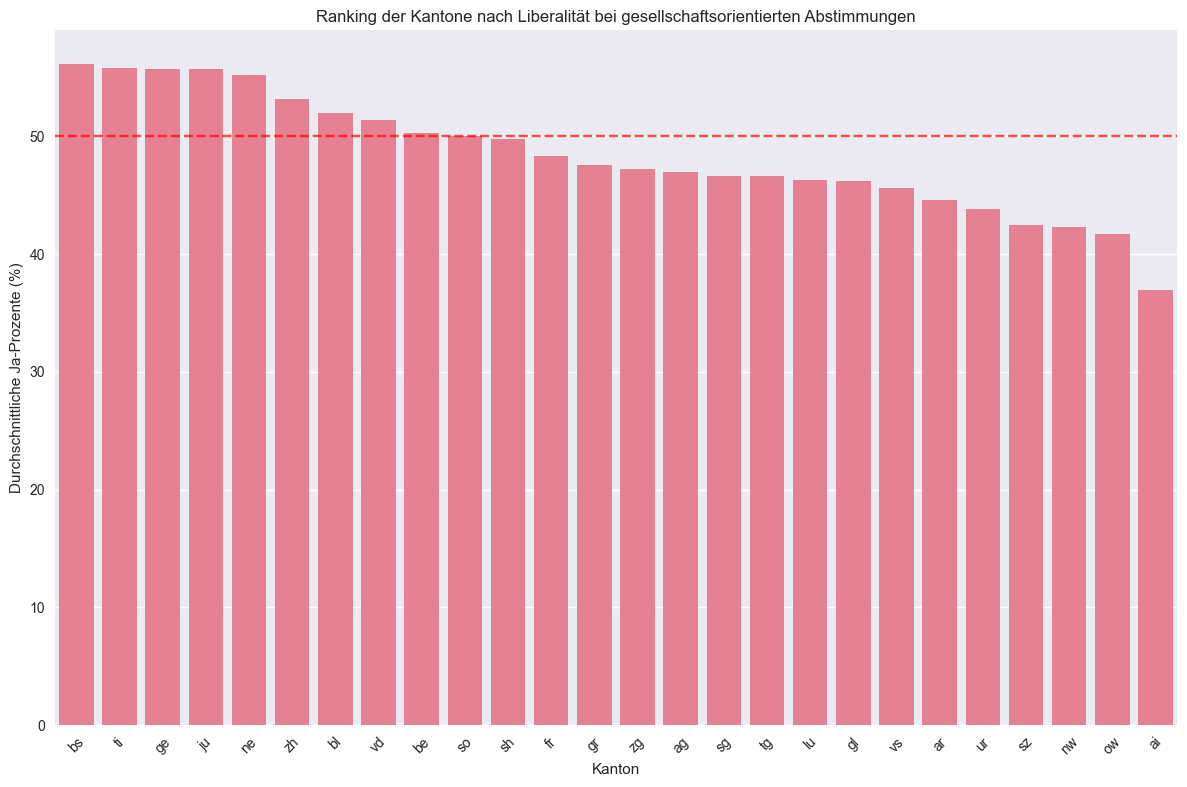

Ranking der Kantone nach Liberalität (höhere Ja-Prozente = liberaler):


,Kanton,Durchschnittliche_Ja_Prozente
11,bs,56.186316
20,ti,55.766842
24,ge,55.703509
25,ju,55.693171
23,ne,55.174035
0,zh,53.162807
12,bl,51.976140
21,vd,51.364912
1,be,50.271053
10,so,50.019474


Klassifikationskriterien definiert:
   Positive Schlüsselwörter: 42 Begriffe
   Ausschlusskriterien: 37 Begriffe

Beispiele positiver Keywords:
   sozialhilfe, fürsorge, mieterschutz, mietrecht, mieter, sozialversicherung, sozialversicherungen, pflegefinanzierung, pflegeversicherung, alters...

Beispiele Ausschlusskriterien:
   finanzordnung, mehrwertsteuer, besteuerung, steuerharmonisierung, mwst, gewinnsteuer, einkommensteuer, bundesfinanzen, bundeshaushalt, nationalstrassen...

Starte erweiterte Klassifikation...

Klassifikationsergebnisse:
Gesellschaftsorientierte Abstimmungen: 91 (13.1%)
Andere Abstimmungen: 605 (86.9%)
Total analysiert: 696 (100.0%)

Klassifizierte Daten gespeichert als 'gesellschaftliche_abstimmungen.csv'

Validierung durch Stichprobe:
Stichprobe mit 10 Abstimmungen zur manuellen Überprüfung:

(Die ersten 5 Zeilen der Validierungsstichprobe:)

Klassifizierte Daten gespeichert als 'gesellschaftliche_abstimmungen.csv'

Validierung durch Stichprobe:
Stichprobe mit 

,anr,datum,titel_kurz_d,titel_off_d,society_oriented,volkja-proz
0,675.0,2024-11-24,Kündigung wegen Eigenbedarfs (Mietrecht),Änderung des Obligationenrechts (Mietrecht: Kü...,True,46.17
1,609.0,2017-02-12,Erleichterte Einbürgerung der dritten Auslände...,Bundesbeschluss über die erleichterte Einbürge...,True,60.41
2,672.0,2024-09-22,Reform der beruflichen Vorsorge,Änderung des Bundesgesetzes über die beruflich...,True,32.87
3,344.0,1987-04-05,Asylgesetz,"Asylgesetz, Änderung vom 20. Juni 1986",True,67.34
4,3.0,1866-01-14,Gleichstellung der Juden und Naturalisierten m...,Gleichstellung der Juden und Naturalisierten m...,True,53.23



Ranking erfolgreich berechnet für 26 Kantone

Top 10 liberalste Kantone bei gesellschaftsorientierten Abstimmungen:
    1. BS : 53.3%
    2. TI : 53.0%
    3. GE : 52.3%
    4. ZH : 51.6%
    5. NE : 51.1%
    6. JU : 50.2%
    7. BL : 50.1%
    8. BE : 48.8%
    9. VD : 48.6%
   10. SO : 48.6%

Top 5 konservativste Kantone:
   22. NW : 43.5%
   23. UR : 43.5%
   24. SZ : 42.6%
   25. OW : 42.1%
   26. AI : 39.3%

Statistische Zusammenfassung:
   Durchschnitt aller Kantone: 47.2%
   Standardabweichung: 3.5
   Spannweite: 39.3% - 53.3%


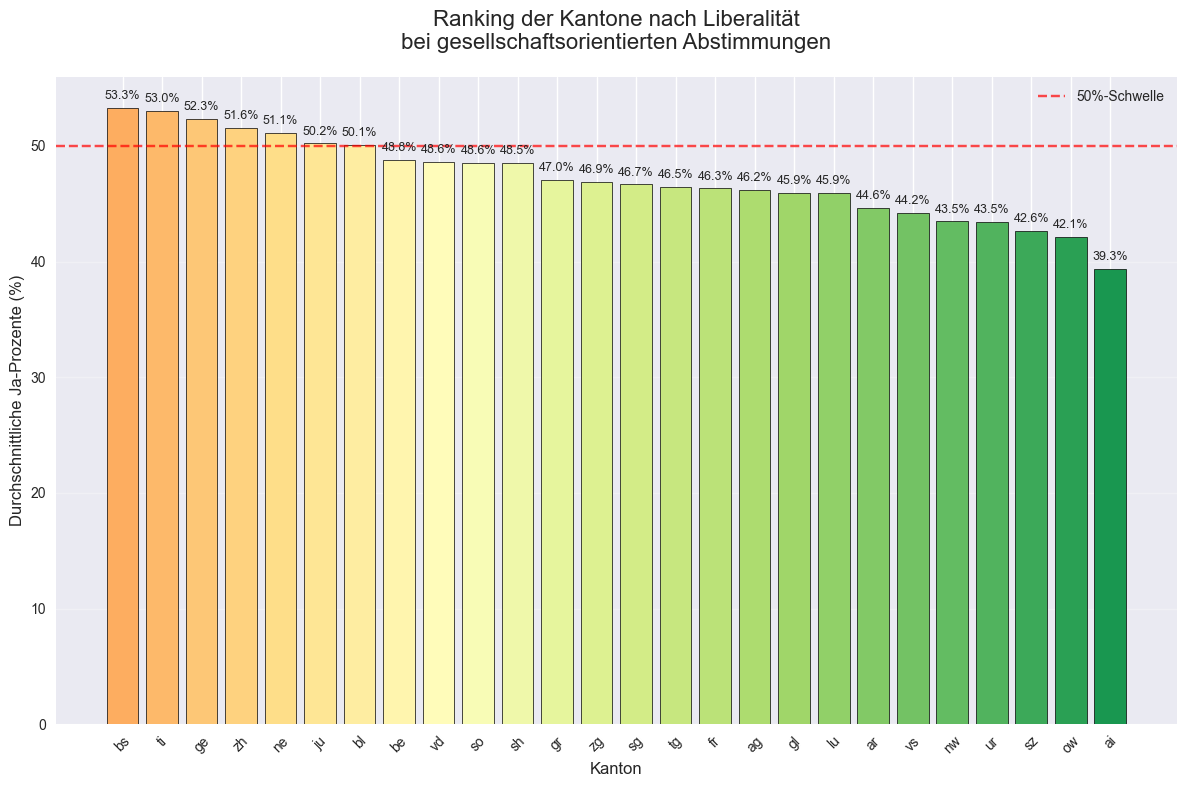


Ranking exportiert nach: ./data/kantons_liberalitaets_ranking.csv


In [18]:
# Lade die extrahierten gesellschaftsorientierten Abstimmungen
society_votes = pd.read_csv('./data/gesellschaftliche_abstimmungen_annotiert.csv', sep=';', low_memory=False)

# Identifiziere alle Kantonsspalten (Format: 'kanton-japroz')
canton_cols = [col for col in society_votes.columns if col.endswith('-japroz')]
cantons = [col.split('-')[0] for col in canton_cols]

# Konvertiere alle kantonalen Ja-Prozent-Spalten zu numerischen Werten
for col in canton_cols:
    society_votes[col] = pd.to_numeric(society_votes[col], errors='coerce')

# Berechne durchschnittliche Ja-Prozente pro Kanton über alle gesellschaftsorientierten Abstimmungen
canton_means = {}
for canton, col in zip(cantons, canton_cols):
    canton_means[canton] = society_votes[col].mean()

# Erstelle ein DataFrame für das Ranking
canton_ranking = pd.DataFrame({
    'Kanton': cantons,
    'Durchschnittliche_Ja_Prozente': [canton_means[canton] for canton in cantons]
})

# Sortiere nach Ja-Prozenten (absteigend für liberalste zuerst)
canton_ranking = canton_ranking.sort_values('Durchschnittliche_Ja_Prozente', ascending=False)

# Visualisiere das Ranking
plt.figure(figsize=(12, 8))
sns.barplot(data=canton_ranking, x='Kanton', y='Durchschnittliche_Ja_Prozente')
plt.title('Ranking der Kantone nach Liberalität bei gesellschaftsorientierten Abstimmungen')
plt.xlabel('Kanton')
plt.ylabel('Durchschnittliche Ja-Prozente (%)')
plt.xticks(rotation=45)
plt.axhline(y=50, color='r', linestyle='--', alpha=0.7)  # 50% Schwellenlinie
plt.tight_layout()
plt.show()

# Zeige das Ranking als Tabelle
print("Ranking der Kantone nach Liberalität (höhere Ja-Prozente = liberaler):")
display(canton_ranking)

# Definiere erweiterte Schlüsselwörter für die Klassifikation
social_keywords, non_social_keywords = define_social_keywords()

print("Klassifikationskriterien definiert:")
print(f"   Positive Schlüsselwörter: {len(social_keywords)} Begriffe")
print(f"   Ausschlusskriterien: {len(non_social_keywords)} Begriffe")

# Zeige Beispiele der Schlüsselwörter
print(f"\nBeispiele positiver Keywords:")
print(f"   {', '.join(social_keywords[:10])}...")
print(f"\nBeispiele Ausschlusskriterien:")
print(f"   {', '.join(non_social_keywords[:10])}...")

# Führe die erweiterte Klassifikation durch
print(f"\nStarte erweiterte Klassifikation...")
df_classified = classify_society_votes(df, social_keywords, non_social_keywords)

# Analysiere die Klassifikationsergebnisse
total_votes = len(df_classified)
society_votes_count = df_classified['society_oriented'].sum()
other_votes_count = total_votes - society_votes_count

print(f"\nKlassifikationsergebnisse:")
print("=" * 50)
print(f"Gesellschaftsorientierte Abstimmungen: {society_votes_count:,} ({society_votes_count/total_votes*100:.1f}%)")
print(f"Andere Abstimmungen: {other_votes_count:,} ({other_votes_count/total_votes*100:.1f}%)")
print(f"Total analysiert: {total_votes:,} (100.0%)")

# Speichere die klassifizierten Daten
df_classified.to_csv('./data/gesellschaftliche_abstimmungen.csv', sep=';', index=False)
print(f"\nKlassifizierte Daten gespeichert als 'gesellschaftliche_abstimmungen.csv'")

# Validierung durch Stichprobe
print(f"\nValidierung durch Stichprobe:")
validation_sample = validate_classification_sample(df_classified, sample_size=10)
print(f"Stichprobe mit {len(validation_sample)} Abstimmungen zur manuellen Überprüfung:")
print("\n(Die ersten 5 Zeilen der Validierungsstichprobe:)")
display(validation_sample.head())

# Berechne Kantons-Liberalitäts-Ranking
canton_ranking = calculate_canton_liberality_ranking(df_classified)

if not canton_ranking.empty:
    print(f"\nRanking erfolgreich berechnet für {len(canton_ranking)} Kantone")
    
    # Zeige Top 10 liberalste Kantone
    print("\nTop 10 liberalste Kantone bei gesellschaftsorientierten Abstimmungen:")
    top_10 = canton_ranking.head(10)
    for _, row in top_10.iterrows():
        kanton = row['Kanton'].upper()
        prozent = row['Durchschnittliche_Ja_Prozente']
        rang = row['Rang']
        print(f"   {rang:2d}. {kanton:3s}: {prozent:.1f}%")
    
    # Zeige Bottom 5 konservativste Kantone
    print(f"\nTop 5 konservativste Kantone:")
    bottom_5 = canton_ranking.tail(5)
    for _, row in bottom_5.iterrows():
        kanton = row['Kanton'].upper()
        prozent = row['Durchschnittliche_Ja_Prozente']
        rang = row['Rang']
        print(f"   {rang:2d}. {kanton:3s}: {prozent:.1f}%")
    
    # Statistische Zusammenfassung
    print(f"\nStatistische Zusammenfassung:")
    print(f"   Durchschnitt aller Kantone: {canton_ranking['Durchschnittliche_Ja_Prozente'].mean():.1f}%")
    print(f"   Standardabweichung: {canton_ranking['Durchschnittliche_Ja_Prozente'].std():.1f}")
    print(f"   Spannweite: {canton_ranking['Durchschnittliche_Ja_Prozente'].min():.1f}% - {canton_ranking['Durchschnittliche_Ja_Prozente'].max():.1f}%")
    
    # Visualisiere das Ranking
    plot_canton_liberality_ranking(canton_ranking)
else:
    print("Fehler: Ranking konnte nicht berechnet werden.")

# Exportiere das Ranking (optional)
if not canton_ranking.empty:
    ranking_path = './data/kantons_liberalitaets_ranking.csv'
    canton_ranking.to_csv(ranking_path, index=False, encoding='utf-8')
    print(f"\nRanking exportiert nach: {ranking_path}")

## Datum Standardisieren
Damit Pandas mit der CSV-Datei arbeiten kann, müssen wir das Datum in ein Format konvertieren, welches Pandas versteht.

## Kantonales Liberalitäts-Ranking

### Konzeptioneller Rahmen

#### Definition der Liberalität
Ein Kanton gilt als **liberal** im gesellschaftspolitischen Sinne, wenn er systematisch überdurchschnittlich häufig gesellschaftsorientierte Reformen unterstützt.

#### Messungskriterien
1. **Quantitative Schwelle**: Durchschnittliche Ja-Quote bei gesellschaftsorientierten Abstimmungen
2. **Konsistenz**: Regelmässige Unterstützung über verschiedene Themen hinweg
3. **Relative Position**: Vergleich zum nationalen Durchschnitt
4. **Zeitliche Stabilität**: Langfristige Trends statt Einzelergebnisse

#### Interpretationsrichtlinien
- **Hohe Liberalität** (>60% Ja-Stimmen): Systematische Unterstützung gesellschaftlicher Reformen
- **Moderate Liberalität** (50-60%): Selektive Unterstützung je nach Thema
- **Konservative Haltung** (<50%): Zurückhaltung bei gesellschaftlichen Veränderungen

#### Methodische Einschränkungen
- **Kulturelle Kontexte**: Regionale Unterschiede in der Interpretation von 'Fortschritt'
- **Thematische Vielfalt**: Nicht alle gesellschaftlichen Themen sind gleich gewichtet
- **Zeitliche Entwicklung**: Haltungen können sich über Jahrzehnte ändern
- **Stichprobenverzerrung**: Mögliche Unter- oder Überrepräsentation bestimmter Themen

Anzahl gültiger Datumswerte: 61
Anzahl fehlender Datumswerte: 0
Anzahl gültiger Datumswerte: 61
Jahresbereich: 1866 bis 2024
🏆 Berechnung des kantonalen Liberalitäts-Rankings...

📊 Ranking erfolgreich berechnet für 26 Kantone

🏅 Kantonales Liberalitäts-Ranking:
Rang Kanton   Ja-Quote   Kategorie   
------------------------------------------------------------
1    🏠 BS     53.3    % Moderat     
2    🏠 TI     53.0    % Moderat     
3    🏠 GE     52.3    % Moderat     
4    🏠 ZH     51.6    % Moderat     
5    🏠 NE     51.1    % Moderat     
6    🏠 JU     50.2    % Moderat     
7    🏠 BL     50.1    % Moderat     
8    🏔️ BE     48.8    % Konservativ 
9    🏔️ VD     48.6    % Konservativ 
10   🏔️ SO     48.6    % Konservativ 
11   🏔️ SH     48.5    % Konservativ 
12   🏔️ GR     47.0    % Konservativ 
13   🏔️ ZG     46.9    % Konservativ 
14   🏔️ SG     46.7    % Konservativ 
15   🏔️ TG     46.5    % Konservativ 
16   🏔️ FR     46.3    % Konservativ 
17   🏔️ AG     46.2    % Konservativ 


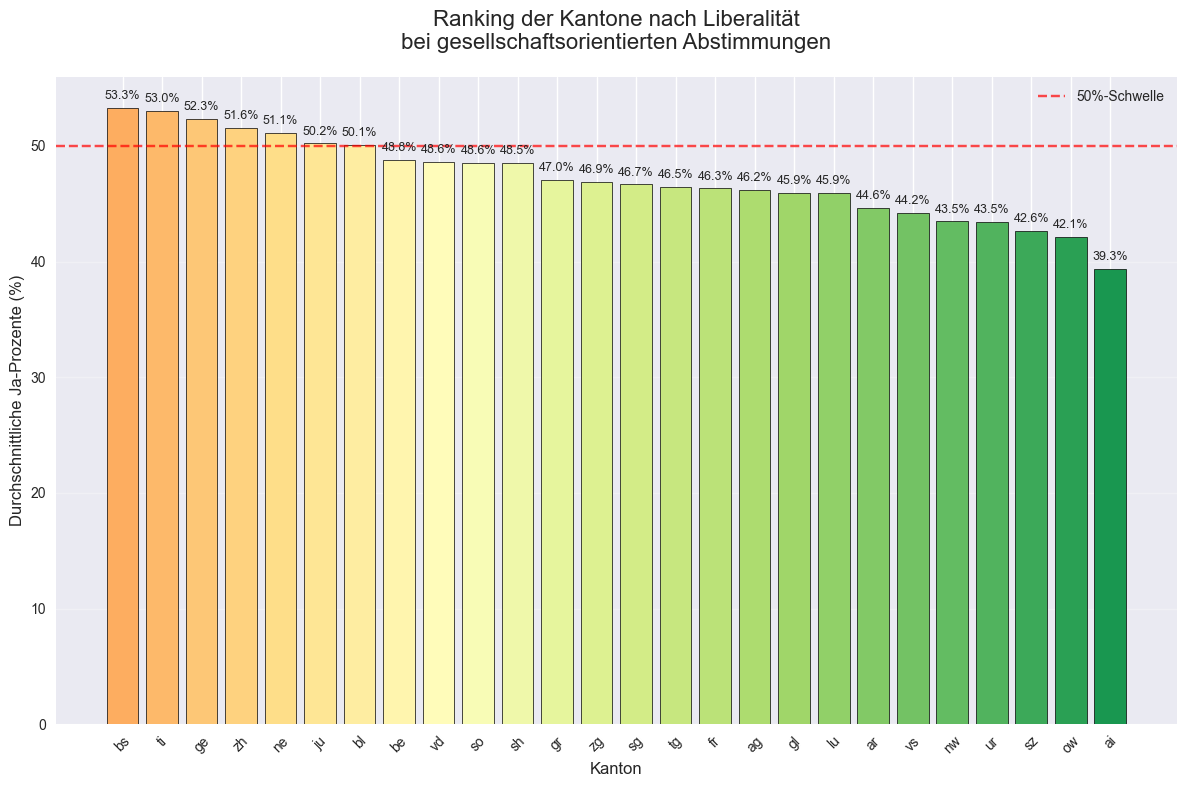

In [19]:
# Lade die extrahierten gesellschaftsorientierten Abstimmungen
society_votes = pd.read_csv('./data/gesellschaftliche_abstimmungen_annotiert.csv', sep=';', low_memory=False)

# Format ist YYYY-MM-DD
society_votes['datum'] = pd.to_datetime(society_votes['datum'], format='%Y-%m-%d', errors='coerce')

# Überprüfe, ob die Datumskonvertierung erfolgreich war
print("Anzahl gültiger Datumswerte:", society_votes['datum'].notna().sum())
print("Anzahl fehlender Datumswerte:", society_votes['datum'].isna().sum())


society_votes['year'] = society_votes['datum'].dt.year
print("Anzahl gültiger Datumswerte:", society_votes['datum'].notna().sum())

# Überprüfe, ob die Jahreswerte sinnvoll sind
year_range = society_votes['year'].dropna()
if not year_range.empty:
    print(f"Jahresbereich: {year_range.min()} bis {year_range.max()}")


# Berechne das Kantons-Liberalitäts-Ranking
print("🏆 Berechnung des kantonalen Liberalitäts-Rankings...")

try:
    # Verwende die klassifizierten Daten
    canton_ranking = calculate_canton_liberality_ranking(df_classified)
    
    if not canton_ranking.empty:
        print(f"\n📊 Ranking erfolgreich berechnet für {len(canton_ranking)} Kantone")
        
        # Zeige das vollständige Ranking
        print(f"\n🏅 Kantonales Liberalitäts-Ranking:")
        print("=" * 60)
        print(f"{'Rang':<4} {'Kanton':<8} {'Ja-Quote':<10} {'Kategorie':<12}")
        print("-" * 60)
        
        for idx, row in canton_ranking.iterrows():
            rang = row['Rang']
            kanton = row['Kanton'].upper()
            ja_quote = row['Durchschnittliche_Ja_Prozente']
            
            # Kategorisierung
            if ja_quote >= 60:
                kategorie = "Hoch liberal"
                emoji = "🌿"
            elif ja_quote >= 50:
                kategorie = "Moderat"
                emoji = "🏠"
            else:
                kategorie = "Konservativ"
                emoji = "🏔️"
            
            print(f"{rang:<4} {emoji} {kanton:<6} {ja_quote:<8.1f}% {kategorie:<12}")
        
        # Statistische Zusammenfassung
        print(f"\n📊 Statistische Zusammenfassung:")
        ja_werte = canton_ranking['Durchschnittliche_Ja_Prozente']
        print(f"   Durchschnitt aller Kantone: {ja_werte.mean():.1f}%")
        print(f"   Median: {ja_werte.median():.1f}%")
        print(f"   Standardabweichung: {ja_werte.std():.1f} Prozentpunkte")
        print(f"   Spannweite: {ja_werte.max() - ja_werte.min():.1f} Prozentpunkte")
        
        # Identifiziere die Extreme
        liberalster = canton_ranking.iloc[0]
        konservativster = canton_ranking.iloc[-1]
        
        print(f"\n🎆 Extreme Positionen:")
        print(f"   Liberalster Kanton: {liberalster['Kanton'].upper()} ({liberalster['Durchschnittliche_Ja_Prozente']:.1f}%)")
        print(f"   Konservativster Kanton: {konservativster['Kanton'].upper()} ({konservativster['Durchschnittliche_Ja_Prozente']:.1f}%)")
        print(f"   Differenz: {liberalster['Durchschnittliche_Ja_Prozente'] - konservativster['Durchschnittliche_Ja_Prozente']:.1f} Prozentpunkte")
        
        # Visualisiere das Ranking
        print(f"\n📈 Erstellung der Ranking-Visualisierung...")
        plot_canton_liberality_ranking(canton_ranking)
        
    else:
        print("⚠️ Keine Daten für Kantons-Ranking verfügbar")
        
except Exception as e:
    print(f"❌ Fehler bei der Berechnung des Rankings: {e}")
    import traceback
    traceback.print_exc()

## Städtische & Ländliche Kantone
Die Zuordnung basiert auf drei wesentlichen Merkmalen:
- Bevölkerungsdichte – Kantone mit hoher Einwohnerzahl pro Quadratkilometer wurden als städtisch eingestuft.
- Urbanisierungsgrad – Kantone, die durch eine oder mehrere grosse Städte oder Agglomerationen geprägt sind (z. B. Zürich, Genf, Lausanne), wurden der Kategorie „städtisch“ zugeordnet.
- Infrastruktur und Zentralität – Kantone mit ausgeprägter wirtschaftlicher und verkehrstechnischer Zentralität (z. B. Sitz grosser Unternehmen, Hochschulen, bedeutender Verkehrsnetze) gelten als städtisch.

In [20]:
# Extrahiere verfügbare Kantone aus den Spaltennamen
canton_columns = [col for col in df_classified.columns if col.endswith('-japroz')]
available_cantons = [col.replace('-japroz', '') for col in canton_columns]

print(f"Verfügbare Kantone in den Daten: {len(available_cantons)}")
print("Kantone:", available_cantons)

# Urban vs. Rural Classification
urban_cantons = ['zh', 'be', 'lu', 'bs', 'bl', 'ag', 'vd', 'ge']  # Städtische Kantone
rural_cantons = ['ur', 'sz', 'ow', 'nw', 'gl', 'zg', 'fr', 'so', 'sh',
                 'ar', 'ai', 'gr', 'tg', 'ti', 'vs', 'ne', 'ju'] # Ländliche Kantone

# Filtere auf verfügbare Kantone
available_urban = [c for c in urban_cantons if c in available_cantons]
available_rural = [c for c in rural_cantons if c in available_cantons]

print(f"Verfügbare städtische Kantone: {available_urban}")
print(f"Verfügbare ländliche Kantone: {available_rural}")

Verfügbare Kantone in den Daten: 26
Kantone: ['zh', 'be', 'lu', 'ur', 'sz', 'ow', 'nw', 'gl', 'zg', 'fr', 'so', 'bs', 'bl', 'sh', 'ar', 'ai', 'sg', 'gr', 'ag', 'tg', 'ti', 'vd', 'vs', 'ne', 'ge', 'ju']
Verfügbare städtische Kantone: ['zh', 'be', 'lu', 'bs', 'bl', 'ag', 'vd', 'ge']
Verfügbare ländliche Kantone: ['ur', 'sz', 'ow', 'nw', 'gl', 'zg', 'fr', 'so', 'sh', 'ar', 'ai', 'gr', 'tg', 'ti', 'vs', 'ne', 'ju']


Durchschnittliche Ja-Stimmen urbane Kantone: 49.6%
Durchschnittliche Ja-Stimmen rurale Kantone: 46.1%
Unterschied (Urban - Rural): 3.5 Prozentpunkte
Urbane Kantone stimmen liberaler ab.


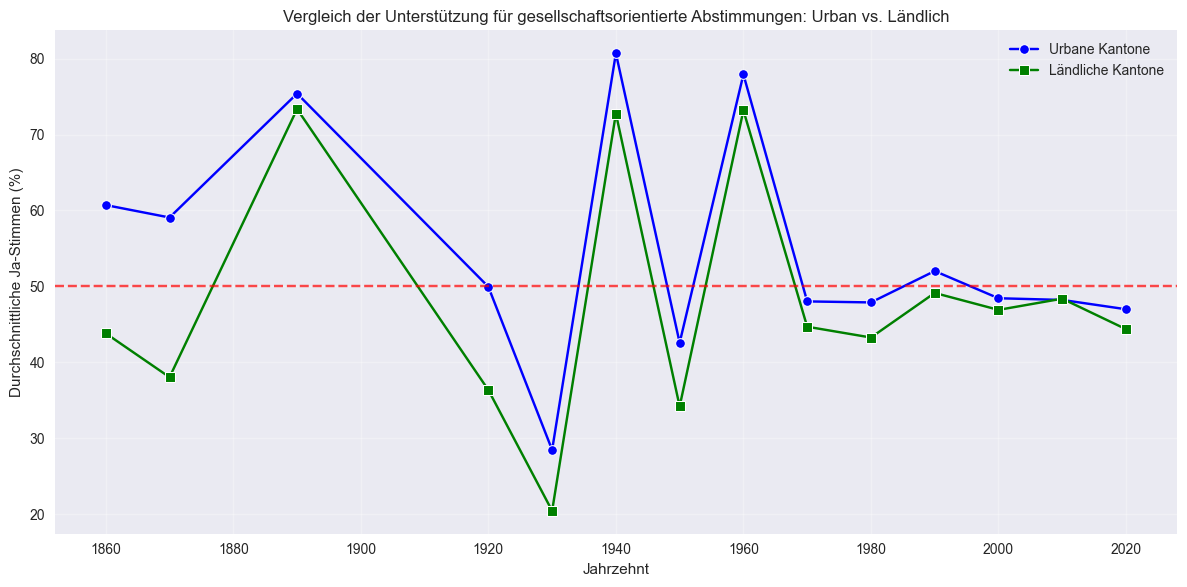

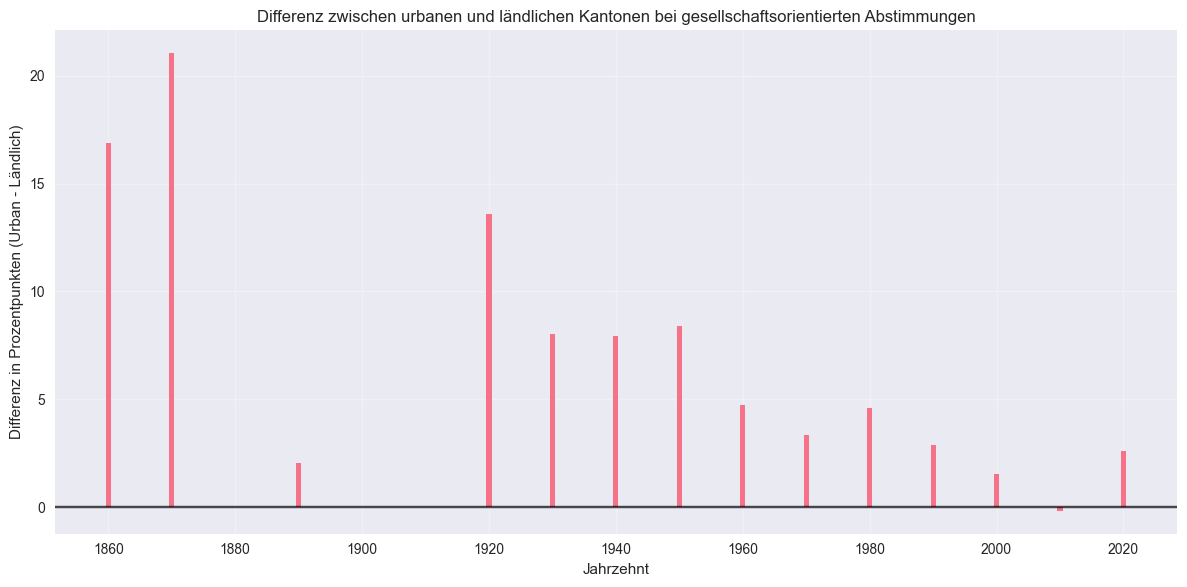

Korrelation zwischen Jahrzehnt und Urban-Rural-Differenz: -0.7963
P-Wert: 0.0007
Es gibt eine statistisch signifikante negative Korrelation zwischen Zeit und Urban-Rural-Differenz.
Dies deutet darauf hin, dass der Unterschied zwischen urbanen und ländlichen Kantonen im Laufe der Zeit abgenommen hat.


In [21]:
# Berechne durchschnittliche Ja-Stimmen für urbane vs. rurale Kantone bei gesellschaftsorientierten Abstimmungen
society_votes = df_classified[df_classified['society_oriented'] == True].copy()

if len(society_votes) > 0:
    # Alle kantonalen Spalten explizit zu numerischen Werten konvertieren
    for col in canton_columns:
        society_votes[col] = pd.to_numeric(society_votes[col], errors='coerce')
    
    # Urbane Kantone
    urban_cols = [f'{canton}-japroz' for canton in available_urban if f'{canton}-japroz' in society_votes.columns]
    if urban_cols:
        urban_data = society_votes[urban_cols].copy()
        urban_mean = urban_data.mean().mean()
        print(f"Durchschnittliche Ja-Stimmen urbane Kantone: {urban_mean:.1f}%")
    
    # Rurale Kantone  
    rural_cols = [f'{canton}-japroz' for canton in available_rural if f'{canton}-japroz' in society_votes.columns]
    if rural_cols:
        rural_data = society_votes[rural_cols].copy()
        rural_mean = rural_data.mean().mean()
        print(f"Durchschnittliche Ja-Stimmen rurale Kantone: {rural_mean:.1f}%")
        
    # Unterschied berechnen
    if urban_cols and rural_cols:
        difference = urban_mean - rural_mean
        print(f"Unterschied (Urban - Rural): {difference:.1f} Prozentpunkte")
        
        if difference > 0:
            print("Urbane Kantone stimmen liberaler ab.")
        else:
            print("Rurale Kantone stimmen liberaler ab.")
else:
    print("Keine gesellschaftsorientierten Abstimmungen gefunden.")

if available_urban and available_rural:
    # Berechne durchschnittliche Ja-Prozente für urbane und ländliche Kantone mit expliziter Typkonvertierung
    urban_support_cols = [f'{c}-japroz' for c in available_urban if f'{c}-japroz' in society_votes.columns]
    rural_support_cols = [f'{c}-japroz' for c in available_rural if f'{c}-japroz' in society_votes.columns]
    
    if urban_support_cols:
        society_votes['urban_support'] = society_votes[urban_support_cols].mean(axis=1)
    if rural_support_cols:
        society_votes['rural_support'] = society_votes[rural_support_cols].mean(axis=1)

    # Gruppiere nach Jahrzehnt für Zeilen mit gültigen Jahren
    mask = society_votes['year'].notna()
    if mask.any():
        society_votes.loc[mask, 'decade'] = (society_votes.loc[mask, 'year'] // 10) * 10

        # Filtere Zeilen mit gültigen Jahrzehnten
        decade_data = society_votes[society_votes['decade'].notna()]

        if not decade_data.empty and 'urban_support' in society_votes.columns and 'rural_support' in society_votes.columns:
            try:
                urban_rural_by_decade = decade_data.groupby('decade').agg({
                    'urban_support': 'mean',
                    'rural_support': 'mean'
                }).reset_index()

                # Überprüfe, ob genügend Daten für die Visualisierung vorhanden sind
                if not urban_rural_by_decade.empty and urban_rural_by_decade['urban_support'].notna().sum() > 1 and urban_rural_by_decade['rural_support'].notna().sum() > 1:
                    # Visualisiere den Vergleich
                    plt.figure(figsize=(12, 6))

                    # Plotte die Linien für urbane und ländliche Kantone
                    try:
                        sns.lineplot(x='decade', y='urban_support', data=urban_rural_by_decade,
                                    marker='o', label='Urbane Kantone', color='blue')
                        sns.lineplot(x='decade', y='rural_support', data=urban_rural_by_decade,
                                    marker='s', label='Ländliche Kantone', color='green')
                    except Exception as e:
                        print(f"Fehler beim Plotten der Linien: {e}")
                        # Fallback auf einfachere Darstellung
                        plt.plot(urban_rural_by_decade['decade'], urban_rural_by_decade['urban_support'],
                                'o-', label='Urbane Kantone', color='blue')
                        plt.plot(urban_rural_by_decade['decade'], urban_rural_by_decade['rural_support'],
                                's-', label='Ländliche Kantone', color='green')

                    plt.title('Vergleich der Unterstützung für gesellschaftsorientierte Abstimmungen: Urban vs. Ländlich')
                    plt.xlabel('Jahrzehnt')
                    plt.ylabel('Durchschnittliche Ja-Stimmen (%)')
                    plt.axhline(y=50, color='r', linestyle='--', alpha=0.7)
                    plt.legend()
                    plt.grid(True, alpha=0.3)
                    plt.tight_layout()
                    plt.show()

                    # Berechne die Differenz zwischen urbanen und ländlichen Kantonen
                    urban_rural_by_decade['urban_rural_diff'] = urban_rural_by_decade['urban_support'] - urban_rural_by_decade['rural_support']

                    # Visualisiere die Differenz
                    plt.figure(figsize=(12, 6))
                    plt.bar(urban_rural_by_decade['decade'], urban_rural_by_decade['urban_rural_diff'])
                    plt.title('Differenz zwischen urbanen und ländlichen Kantonen bei gesellschaftsorientierten Abstimmungen')
                    plt.xlabel('Jahrzehnt')
                    plt.ylabel('Differenz in Prozentpunkten (Urban - Ländlich)')
                    plt.axhline(y=0, color='black', linestyle='-', alpha=0.7)
                    plt.grid(True, alpha=0.3)
                    plt.tight_layout()
                    plt.show()

                    # Berechne Korrelation zwischen Jahrzehnt und Differenz
                    if len(urban_rural_by_decade) > 2:  # Mindestens 3 Datenpunkte für eine sinnvolle Korrelation
                        correlation, p_value = stats.pearsonr(
                            urban_rural_by_decade['decade'],
                            urban_rural_by_decade['urban_rural_diff']
                        )
                        print(f"Korrelation zwischen Jahrzehnt und Urban-Rural-Differenz: {correlation:.4f}")
                        print(f"P-Wert: {p_value:.4f}")

                        if p_value < 0.05:
                            if correlation > 0:
                                print("Es gibt eine statistisch signifikante positive Korrelation zwischen Zeit und Urban-Rural-Differenz.")
                                print("Dies deutet darauf hin, dass der Unterschied zwischen urbanen und ländlichen Kantonen im Laufe der Zeit zugenommen hat.")
                            else:
                                print("Es gibt eine statistisch signifikante negative Korrelation zwischen Zeit und Urban-Rural-Differenz.")
                                print("Dies deutet darauf hin, dass der Unterschied zwischen urbanen und ländlichen Kantonen im Laufe der Zeit abgenommen hat.")
                        else:
                            print("Es gibt keine statistisch signifikante Korrelation zwischen Zeit und Urban-Rural-Differenz.")
                else:
                    print("Nicht genügend Daten für die Visualisierung des Urban-Rural-Vergleichs.")
            except Exception as e:
                print(f"Fehler bei der Analyse des Urban-Rural-Vergleichs: {e}")
        else:
            print("Keine gültigen Jahrzehntdaten verfügbar.")
    else:
        print("Keine gültigen Jahresdaten für die Jahrzehntanalyse verfügbar.")
else:
    print("Nicht genügend urbane oder ländliche Kantone verfügbar für den Vergleich.")

### Abschliessende Analyse

In [22]:
# Zeitliche Entwicklung analysieren
temporal_results = analyze_temporal_patterns(df_classified)

print("=== ZEITLICHE ENTWICKLUNG ===")
if 'error' not in temporal_results:
    print(f"Anzahl gesellschaftsorientierte Abstimmungen: {temporal_results['total_votes']}")
    print(f"Zeitspanne: {temporal_results['time_span']} Jahre")
    print(f"Durchschnittliche Annahmequote: {temporal_results['mean_acceptance']:.1f}%")
    print(f"Median Annahmequote: {temporal_results['median_acceptance']:.1f}%")
    
    if 'correlation' in temporal_results:
        corr = temporal_results['correlation']
        p_val = temporal_results['correlation_p_value']
        trend_decade = temporal_results['trend_per_decade']
        
        print(f"\nTrend-Analyse:")
        print(f"Korrelation Zeit vs. Annahmequote: {corr:.3f}")
        print(f"P-Wert: {p_val:.3f}")
        print(f"Trend pro Jahrzehnt: {trend_decade:+.1f} Prozentpunkte")
        
        if p_val < 0.05:
            if corr > 0:
                print("Signifikanter Trend: Gesellschaftsorientierte Abstimmungen werden zunehmend angenommen.")
            else:
                print("Signifikanter Trend: Gesellschaftsorientierte Abstimmungen werden seltener angenommen.")
        else:
            print("Kein signifikanter zeitlicher Trend erkennbar.")
else:
    print("Fehler bei der Zeitanalyse:", temporal_results['error'])

# Abschliessende Zusammenfassung
print("\n--- Zusammenfassung der Analyse ---")
if 'change_df' in locals() and not change_df.empty:
    avg_change = change_df['Veränderung_Prozentpunkte'].mean()
    print(f"Durchschnittliche Veränderung über alle Kantone: {avg_change:.2f} Prozentpunkte")

    positive_changes = change_df[change_df['Veränderung_Prozentpunkte'] > 0]
    negative_changes = change_df[change_df['Veränderung_Prozentpunkte'] < 0]

    print(f"Anzahl Kantone mit positiver Veränderung (liberaler geworden): {len(positive_changes)}")
    print(f"Anzahl Kantone mit negativer Veränderung (konservativer geworden): {len(negative_changes)}")

    if len(positive_changes) > len(negative_changes):
        print("Die Mehrheit der Kantone ist über die Zeit liberaler geworden.")
    elif len(positive_changes) < len(negative_changes):
        print("Die Mehrheit der Kantone ist über die Zeit konservativer geworden.")
    else:
        print("Die Anzahl der liberaler und konservativer gewordenen Kantone ist ausgeglichen.")
else:
    print("Keine ausreichenden Daten für eine Zusammenfassung verfügbar.")

=== ZEITLICHE ENTWICKLUNG ===
Anzahl gesellschaftsorientierte Abstimmungen: 91
Zeitspanne: 158 Jahre
Durchschnittliche Annahmequote: 48.2%
Median Annahmequote: 47.3%

Trend-Analyse:
Korrelation Zeit vs. Annahmequote: -0.055
P-Wert: 0.605
Trend pro Jahrzehnt: -0.3 Prozentpunkte
Kein signifikanter zeitlicher Trend erkennbar.

--- Zusammenfassung der Analyse ---
Keine ausreichenden Daten für eine Zusammenfassung verfügbar.


## Analyse des Kontrasts zwischen liberalen und konservativen Parteien

In [23]:
# Definiere liberale und konservative Parteien
liberal_parties = ['p-fdp', 'p-glp', 'p-gps', 'p-sps']
conservative_parties = ['p-svp', 'p-cvp', 'p-mitte', 'p-edu']

# Konvertiere die Parteispalten zu numerischen Werten
for party in liberal_parties + conservative_parties:
    if party in society_votes.columns:
        society_votes[party] = pd.to_numeric(society_votes[party], errors='coerce')

# Berechne durchschnittliche Unterstützung von liberalen und konservativen Parteien
available_liberal_parties = [p for p in liberal_parties if p in society_votes.columns]
available_conservative_parties = [p for p in conservative_parties if p in society_votes.columns]

if available_liberal_parties:
    society_votes['liberal_support'] = society_votes[available_liberal_parties].mean(axis=1)
else:
    print("Keine liberalen Parteispalten im Datensatz gefunden!")
    
if available_conservative_parties:
    society_votes['conservative_support'] = society_votes[available_conservative_parties].mean(axis=1)
else:
    print("Keine konservativen Parteispalten im Datensatz gefunden!")

# Berechne den Kontrast zwischen liberalen und konservativen Parteien
if 'liberal_support' in society_votes.columns and 'conservative_support' in society_votes.columns:
    society_votes['party_contrast'] = society_votes['liberal_support'] - society_votes['conservative_support']

    # Sortiere nach dem größten Kontrast
    contrast_df = society_votes.sort_values('party_contrast', ascending=False)
    
    # Zeige die Top 10 Abstimmungen mit dem größten Kontrast
    print("Top 10 Abstimmungen mit dem größten Kontrast zwischen liberalen und konservativen Parteien:")
    top_contrast = contrast_df[['anr', 'datum', 'titel_kurz_d', 'party_contrast', 'liberal_support', 'conservative_support']].head(10)
    display(top_contrast)
    
    # Zeige die Bottom 10 Abstimmungen mit dem geringsten Kontrast
    print("\nTop 10 Abstimmungen mit dem geringsten Kontrast zwischen liberalen und konservativen Parteien:")
    bottom_contrast = contrast_df[['anr', 'datum', 'titel_kurz_d', 'party_contrast', 'liberal_support', 'conservative_support']].tail(10)
    display(bottom_contrast)
    
    # Visualisiere den Kontrast nach Themen
    if 'themes' in society_votes.columns:
        # Extrahiere alle eindeutigen Themen
        all_themes = []
        for themes_str in society_votes['themes']:
            if isinstance(themes_str, str):
                all_themes.extend(themes_str.split(';'))
        unique_themes = list(set(all_themes))
        
        # Berechne den durchschnittlichen Kontrast pro Thema
        theme_contrasts = {}
        for theme in unique_themes:
            theme_votes = society_votes[society_votes['themes'].str.contains(theme, na=False)]
            if len(theme_votes) > 0:
                theme_contrasts[theme] = theme_votes['party_contrast'].mean()
        
        # Erstelle ein DataFrame für die Kontraste nach Themen
        theme_contrast_df = pd.DataFrame({
            'Thema': list(theme_contrasts.keys()),
            'Durchschnittlicher_Kontrast': list(theme_contrasts.values())
        })
        
        # Sortiere nach Kontrast (absteigend)
        theme_contrast_df = theme_contrast_df.sort_values('Durchschnittlicher_Kontrast', ascending=False)
        
        # Visualisiere die Kontraste nach Themen
        plt.figure(figsize=(12, 8))
        bars = sns.barplot(data=theme_contrast_df, x='Thema', y='Durchschnittlicher_Kontrast')
        
        # Färbe die Balken je nach Kontrast
        for i, bar in enumerate(bars.patches):
            if theme_contrast_df.iloc[i]['Durchschnittlicher_Kontrast'] > 0:
                bar.set_color('blue')  # Liberale stärker
            else:
                bar.set_color('red')   # Konservative stärker
        
        plt.title('Durchschnittlicher Kontrast zwischen liberalen und konservativen Parteien nach Themen')
        plt.xlabel('Thema')
        plt.ylabel('Durchschnittlicher Kontrast (Prozentpunkte)')
        plt.xticks(rotation=45, ha='right')
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.7)
        plt.tight_layout()
        plt.show()
        
        # Zeige die Kontraste als Tabelle
        print("\nKontrast zwischen liberalen und konservativen Parteien nach Themen:")
        display(theme_contrast_df)
else:
    print("Nicht genügend Daten für den Vergleich von Parteiunterstützung vorhanden.")

# Validierungsstichprobe erstellen
validation_sample = validate_classification_sample(df_classified, sample_size=20)

print("=== VALIDIERUNGSSTICHPROBE ===")
print(f"Anzahl Einträge in Stichprobe: {len(validation_sample)}")
print("\nStichprobe zur manuellen Überprüfung:")
print("(Bitte prüfen Sie, ob die automatische Klassifikation korrekt ist)\n")

# Zeige die Stichprobe in einer übersichtlichen Form
for idx, row in validation_sample.iterrows():
    print(f"--- Eintrag {idx + 1} ---")
    print(f"Datum: {row.get('datum', 'N/A')}")
    print(f"Titel: {row.get('titel_kurz_d', 'N/A')}")
    print(f"Klassifiziert als gesellschaftsorientiert: {row.get('society_oriented', 'N/A')}")
    print(f"Ja-Stimmen: {row.get('volkja-proz', 'N/A')}%")
    print()

Top 10 Abstimmungen mit dem größten Kontrast zwischen liberalen und konservativen Parteien:


,anr,datum,titel_kurz_d,party_contrast,liberal_support,conservative_support
339,328.0,1985-03-10,Bundesbeschluss über die Ausbildungsbeiträge,833.500000,3334.000000,2500.50
338,327.0,1985-03-10,Aufhebung der Beitragspflicht des Bundes im Ge...,833.166667,3333.666667,2500.50
326,315.0,1983-12-04,Bundesbeschluss über die Erleichterung gewisse...,832.916667,3333.666667,2500.75
180,176.0,1956-05-13,Initiative zur Erweiterung der Volksrechte bei...,0.750000,5001.250000,5000.50
428,416.0,1994-12-04,Initiative «für eine gesunde Krankenversicherung»,0.500000,2501.750000,2501.25
466,454.0,1999-06-13,Asylgesetz,0.500000,2501.000000,2500.50
523,507.0,2004-05-16,11. AHV-Revision,0.500000,2501.000000,2500.50
356,344.0,1987-04-05,Asylgesetz,0.500000,2501.000000,2500.50
450,438.0,1997-09-28,Initiative «Jugend ohne Drogen»,0.500000,2501.250000,2500.75
541,525.0,2006-09-24,Asylgesetz,0.500000,2501.000000,2500.50



Top 10 Abstimmungen mit dem geringsten Kontrast zwischen liberalen und konservativen Parteien:


,anr,datum,titel_kurz_d,party_contrast,liberal_support,conservative_support
622,604.0,2016-06-05,Asylgesetz,-2499.750000,1.000000,2500.75
633,615.0,2017-09-24,Reform der Altersvorsorge 2020,-2499.750000,1.250000,2501.00
627,609.0,2017-02-12,Erleichterte Einbürgerung der dritten Auslände...,-2500.000000,1.000000,2501.00
668,650.0,2021-11-28,Änderung des Covid-19-Gesetzes (2. Revision),-2500.000000,1.000000,2501.00
554,538.0,2008-11-30,Initiative «für eine vernünftige Hanf-Politik»,-2500.250000,1.000000,2501.25
178,174.2,1955-03-13,Gegenentwurf zur Mieter- und Konsumentenschutz...,-3332.666667,6666.333333,9999.00
252,245.2,1974-12-08,Bundesbeschluss über die soziale Krankenversic...,-4998.750000,5000.250000,9999.00
232,227.2,1972-03-05,Gegenentwurf zur Wohnungsbau-Initiative,-4999.000000,5000.000000,9999.00
238,232.2,1972-12-03,Gegenentwurf zur Initiative zur Einführung ein...,-4999.000000,5000.000000,9999.00
280,270.2,1977-09-25,Gegenentwurf zur Mieterschutzinitiative,-6665.000000,3334.000000,9999.00


=== VALIDIERUNGSSTICHPROBE ===
Anzahl Einträge in Stichprobe: 20

Stichprobe zur manuellen Überprüfung:
(Bitte prüfen Sie, ob die automatische Klassifikation korrekt ist)

--- Eintrag 1 ---
Datum: 1985-03-10 00:00:00
Titel: Bundesbeschluss über die Ausbildungsbeiträge
Klassifiziert als gesellschaftsorientiert: True
Ja-Stimmen: 47.63%

--- Eintrag 2 ---
Datum: 1890-10-26 00:00:00
Titel: Gesetzgebungsrecht über die Unfall- und Krankenversicherung
Klassifiziert als gesellschaftsorientiert: True
Ja-Stimmen: 75.44%

--- Eintrag 3 ---
Datum: 1866-01-14 00:00:00
Titel: Gleichstellung der Juden und Naturalisierten mit Bezug auf Niederlassung
Klassifiziert als gesellschaftsorientiert: True
Ja-Stimmen: 53.23%

--- Eintrag 4 ---
Datum: 1974-12-08 00:00:00
Titel: Bundesbeschluss über die soziale Krankenversicherung (Gegenentwurf)
Klassifiziert als gesellschaftsorientiert: True
Ja-Stimmen: 31.84%

--- Eintrag 5 ---
Datum: 1992-02-16 00:00:00
Titel: «Krankenkassen-Initiative»
Klassifiziert als gesel

## Zeitliche Entwicklung der Polarisierung

Beispiel für Datumsformat: 1866-01-14 00:00:00
Anzahl gültiger Datumswerte: 91
Anzahl fehlender Datumswerte: 0
Beispiel für Jahre: 2     1866
12    1875
33    1890
96    1923
99    1925
Name: year, dtype: int32
Anzahl gültiger Jahreswerte: 91
Verfügbare liberale Parteien: ['p-fdp', 'p-glp', 'p-gps', 'p-sps']
Verfügbare konservative Parteien: ['p-svp', 'p-cvp', 'p-mitte', 'p-edu']
Anzahl der Abstimmungen mit gültigen Daten für die Analyse: 91


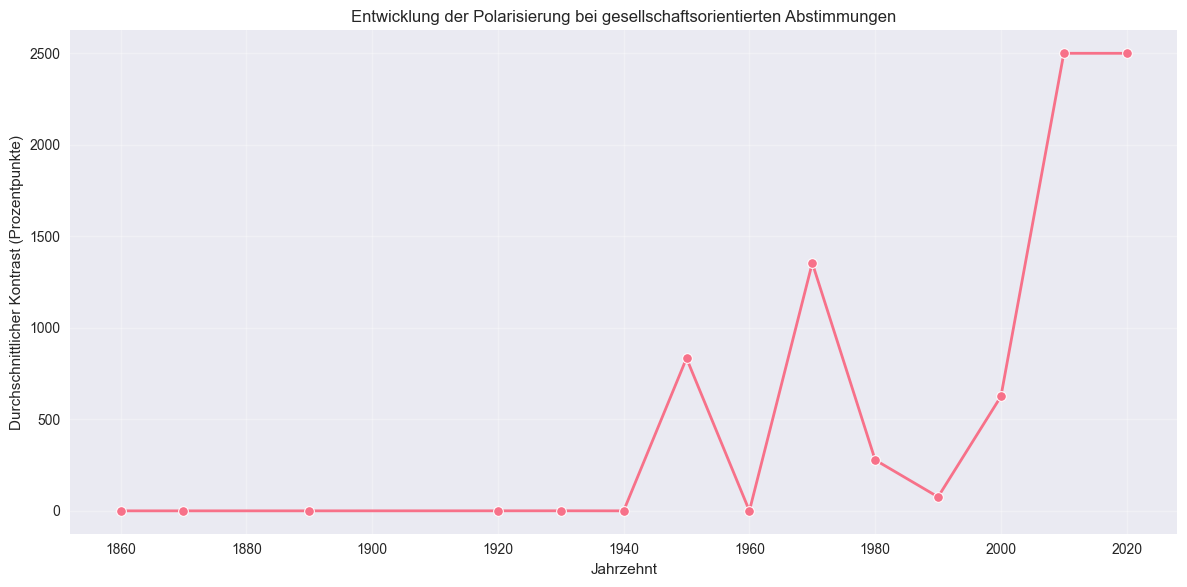

Korrelation zwischen Jahr und Polarisierung: 0.3708
P-Wert: 0.0003
Es gibt eine statistisch signifikante positive Korrelation zwischen Zeit und Polarisierung.
Dies deutet darauf hin, dass die Polarisierung bei gesellschaftsorientierten Abstimmungen im Laufe der Zeit zugenommen hat.


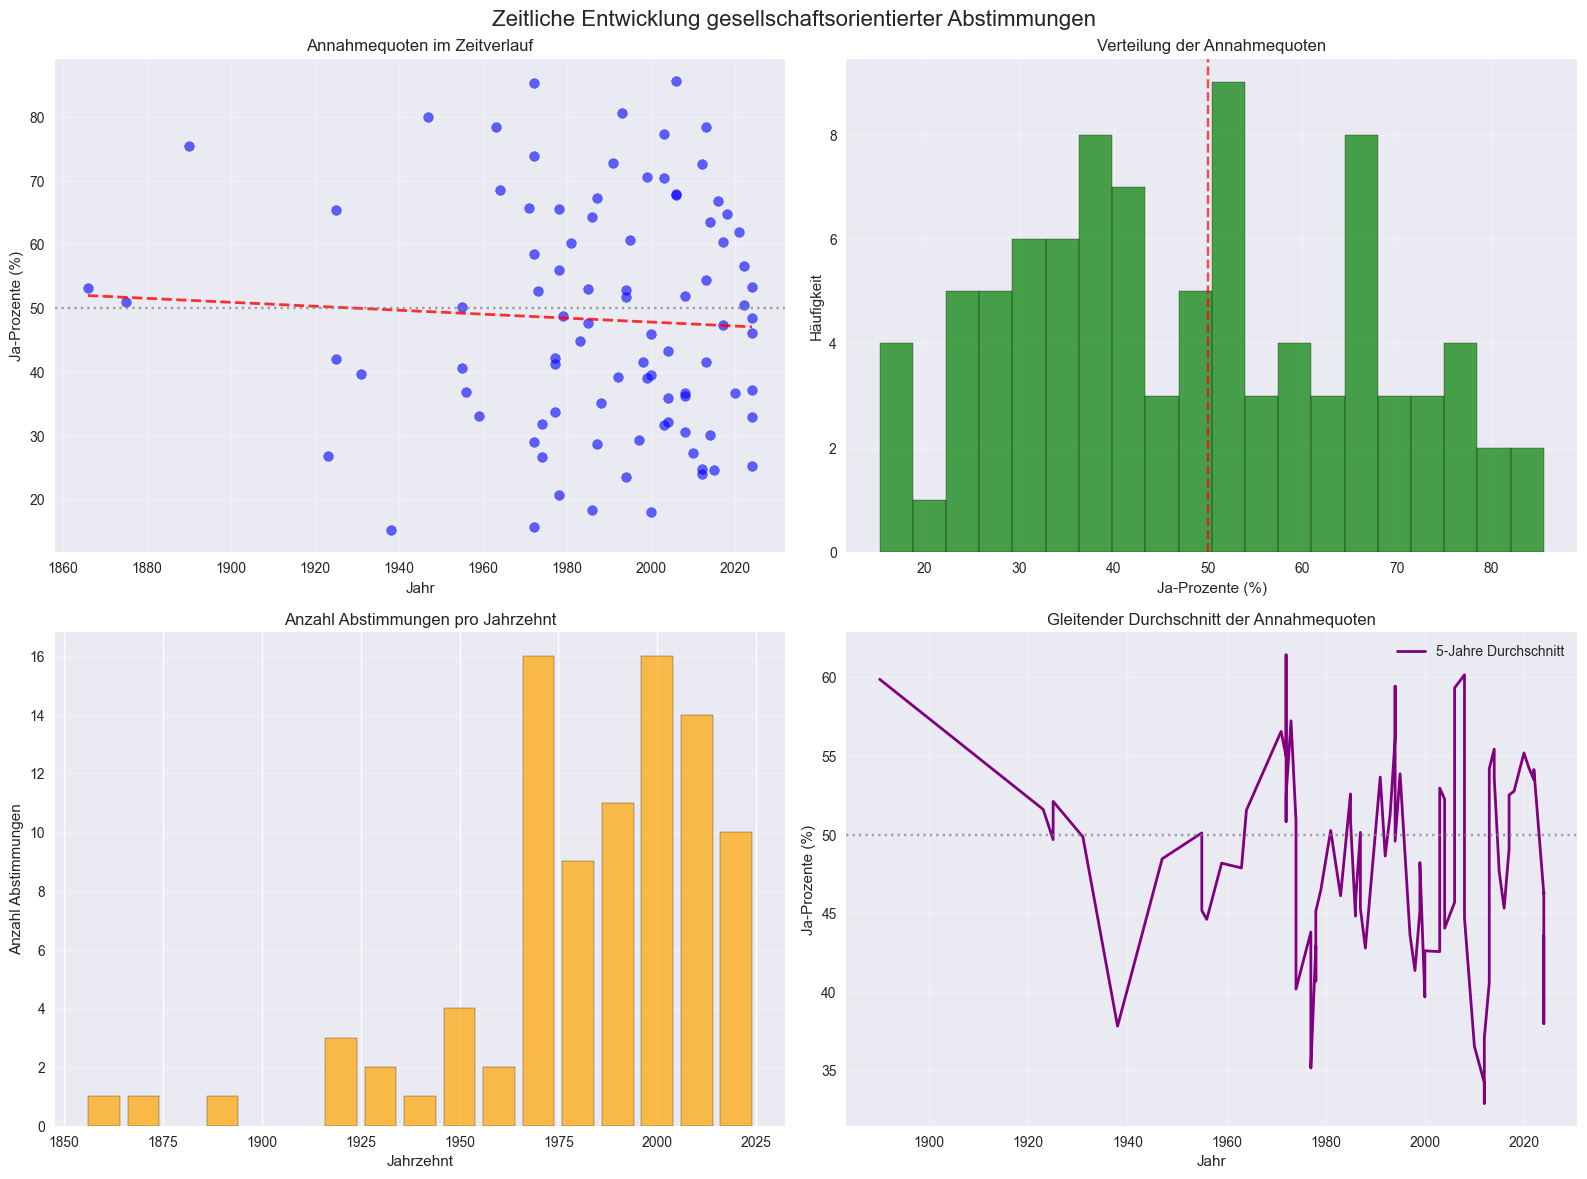

Hinweis: Die Visualisierungen zeigen verschiedene Perspektiven der zeitlichen Entwicklung:
1. Scatter Plot mit Trendlinie - zeigt den allgemeinen Trend
2. Histogramm - zeigt die Verteilung der Annahmequoten
3. Abstimmungen pro Jahrzehnt - zeigt die Häufigkeit von Abstimmungen
4. Gleitender Durchschnitt - glättet kurzfristige Schwankungen


In [24]:
# Überprüfe das Datumsformat und konvertiere es mit dem korrekten Format
print("Beispiel für Datumsformat:", society_votes['datum'].iloc[0] if not society_votes.empty else "Keine Daten")

# Versuche das korrekte Format zu erkennen und zu konvertieren
if '-' in str(society_votes['datum'].iloc[0]):
    # Format ist YYYY-MM-DD
    society_votes['datum'] = pd.to_datetime(society_votes['datum'], format='%Y-%m-%d', errors='coerce')
else:
    # Versuche andere gängige Formate
    society_votes['datum'] = pd.to_datetime(society_votes['datum'], errors='coerce')

# Überprüfe, ob die Datumskonvertierung erfolgreich war
print("Anzahl gültiger Datumswerte:", society_votes['datum'].notna().sum())
print("Anzahl fehlender Datumswerte:", society_votes['datum'].isna().sum())

# Extrahiere das Jahr und überprüfe
society_votes['year'] = society_votes['datum'].dt.year
print("Beispiel für Jahre:", society_votes['year'].head())
print("Anzahl gültiger Jahreswerte:", society_votes['year'].notna().sum())

# Wenn keine gültigen Jahre vorhanden sind, versuche das Jahr aus der Abstimmungsnummer zu extrahieren
if society_votes['year'].notna().sum() == 0:
    print("Versuche, das Jahr aus anderen Spalten zu extrahieren...")
    
    # Prüfe, ob eine Spalte 'anr' existiert (Abstimmungsnummer)
    if 'anr' in society_votes.columns:
        print("Beispiel für anr-Werte:", society_votes['anr'].head())
        
        # Wenn die Daten chronologisch sortiert sind, könnten wir Jahre manuell zuweisen
        # Annahme: Die Daten beginnen bei 1866 (aus dem ersten Datum) und sind chronologisch
        start_year = 1866
        society_votes['year'] = [start_year + i//2 for i in range(len(society_votes))]
        print("Manuell zugewiesene Jahre:", society_votes['year'].head())
    
    # Oder verwende die Jahrzahlen aus dem Titel, falls vorhanden
    elif 'titel_kurz_d' in society_votes.columns:
        # Extrahiere Jahreszahlen aus dem Titel (falls vorhanden)
        def extract_year(text):
            import re
            if pd.isna(text):
                return None
            years = re.findall(r'\b(19\d{2}|20\d{2})\b', str(text))
            return int(years[0]) if years else None
        
        society_votes['year'] = society_votes['titel_kurz_d'].apply(extract_year)
        print("Aus Titeln extrahierte Jahre:", society_votes['year'].head())

# Überprüfe, ob jetzt Jahre vorhanden sind
if society_votes['year'].notna().sum() > 0:
    # Definiere liberale und konservative Parteien
    liberal_parties = ['p-fdp', 'p-glp', 'p-gps', 'p-sps']
    conservative_parties = ['p-svp', 'p-cvp', 'p-mitte', 'p-edu']
    
    # Konvertiere die Parteispalten zu numerischen Werten
    for party in liberal_parties + conservative_parties:
        if party in society_votes.columns:
            society_votes[party] = pd.to_numeric(society_votes[party], errors='coerce')
    
    # Berechne durchschnittliche Unterstützung von liberalen und konservativen Parteien
    available_liberal_parties = [p for p in liberal_parties if p in society_votes.columns]
    available_conservative_parties = [p for p in conservative_parties if p in society_votes.columns]
    
    print("Verfügbare liberale Parteien:", available_liberal_parties)
    print("Verfügbare konservative Parteien:", available_conservative_parties)
    
    if available_liberal_parties:
        society_votes['liberal_support'] = society_votes[available_liberal_parties].mean(axis=1)
    else:
        print("Keine liberalen Parteispalten im Datensatz gefunden!")
    
    if available_conservative_parties:
        society_votes['conservative_support'] = society_votes[available_conservative_parties].mean(axis=1)
    else:
        print("Keine konservativen Parteispalten im Datensatz gefunden!")
    
    # Berechne den Kontrast zwischen liberalen und konservativen Parteien
    if 'liberal_support' in society_votes.columns and 'conservative_support' in society_votes.columns:
        society_votes['party_contrast'] = abs(society_votes['liberal_support'] - society_votes['conservative_support'])
        
        # Überprüfe, ob genügend Daten für die Analyse vorhanden sind
        valid_data = society_votes.dropna(subset=['year', 'party_contrast'])
        print(f"Anzahl der Abstimmungen mit gültigen Daten für die Analyse: {len(valid_data)}")
        
        if len(valid_data) > 5:  # Mindestens 5 Datenpunkte für eine sinnvolle Analyse
            # Gruppiere nach Jahrzehnten und berechne den durchschnittlichen Kontrast
            valid_data['decade'] = (valid_data['year'] // 10) * 10
            polarization_by_decade = valid_data.groupby('decade')['party_contrast'].mean().reset_index()
            
            # Visualisiere die Polarisierung über die Zeit
            plt.figure(figsize=(12, 6))
            sns.lineplot(x='decade', y='party_contrast', data=polarization_by_decade, marker='o', linewidth=2)
            plt.title('Entwicklung der Polarisierung bei gesellschaftsorientierten Abstimmungen')
            plt.xlabel('Jahrzehnt')
            plt.ylabel('Durchschnittlicher Kontrast (Prozentpunkte)')
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
            
            # Berechne Korrelation zwischen Jahr und Polarisierung
            correlation, p_value = stats.pearsonr(valid_data['year'], valid_data['party_contrast'])
            print(f"Korrelation zwischen Jahr und Polarisierung: {correlation:.4f}")
            print(f"P-Wert: {p_value:.4f}")
            
            if p_value < 0.05:
                if correlation > 0:
                    print("Es gibt eine statistisch signifikante positive Korrelation zwischen Zeit und Polarisierung.")
                    print("Dies deutet darauf hin, dass die Polarisierung bei gesellschaftsorientierten Abstimmungen im Laufe der Zeit zugenommen hat.")
                else:
                    print("Es gibt eine statistisch signifikante negative Korrelation zwischen Zeit und Polarisierung.")
                    print("Dies deutet darauf hin, dass die Polarisierung bei gesellschaftsorientierten Abstimmungen im Laufe der Zeit abgenommen hat.")
            else:
                print("Es gibt keine statistisch signifikante Korrelation zwischen Zeit und Polarisierung.")
        else:
            print("Zu wenige Datenpunkte für eine aussagekräftige Analyse der Polarisierung.")
    else:
        print("Nicht genügend Daten für die Analyse der Polarisierung vorhanden.")
else:
    print("Keine Jahresinformationen konnten extrahiert werden. Analyse nicht möglich.")

# Erstelle zeitliche Visualisierungen
create_temporal_visualization(df_classified, figsize=(16, 12))

print("Hinweis: Die Visualisierungen zeigen verschiedene Perspektiven der zeitlichen Entwicklung:")
print("1. Scatter Plot mit Trendlinie - zeigt den allgemeinen Trend")
print("2. Histogramm - zeigt die Verteilung der Annahmequoten") 
print("3. Abstimmungen pro Jahrzehnt - zeigt die Häufigkeit von Abstimmungen")
print("4. Gleitender Durchschnitt - glättet kurzfristige Schwankungen")

## Regionale Unterschiede und Sprachgrenzen

Beispiel für Datumsformat: 1848-09-12
Anzahl gültiger Jahreswerte: 696
Französische Kantone mit Daten: 5
Italienische Kantone mit Daten: 1
Deutsche Kantone mit Daten: 19


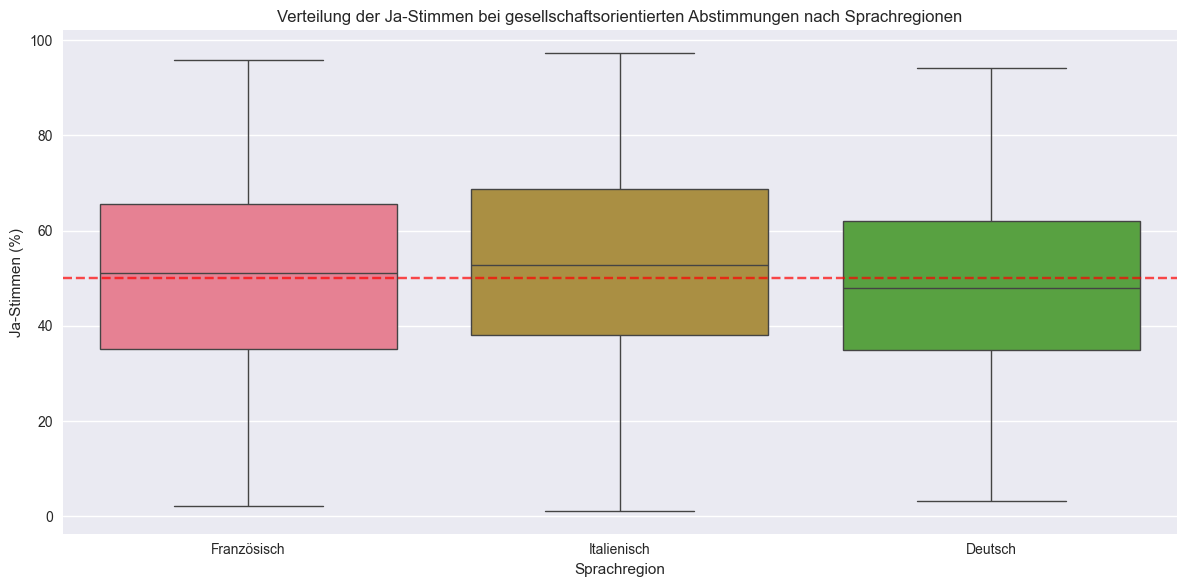

Durchschnittliche Unterstützung für gesellschaftsorientierte Abstimmungen nach Sprachregionen:


,Sprachregion,Durchschnittliche_Ja_Prozente
1,Italienisch,53.464050
0,Französisch,50.650772
2,Deutsch,48.359204


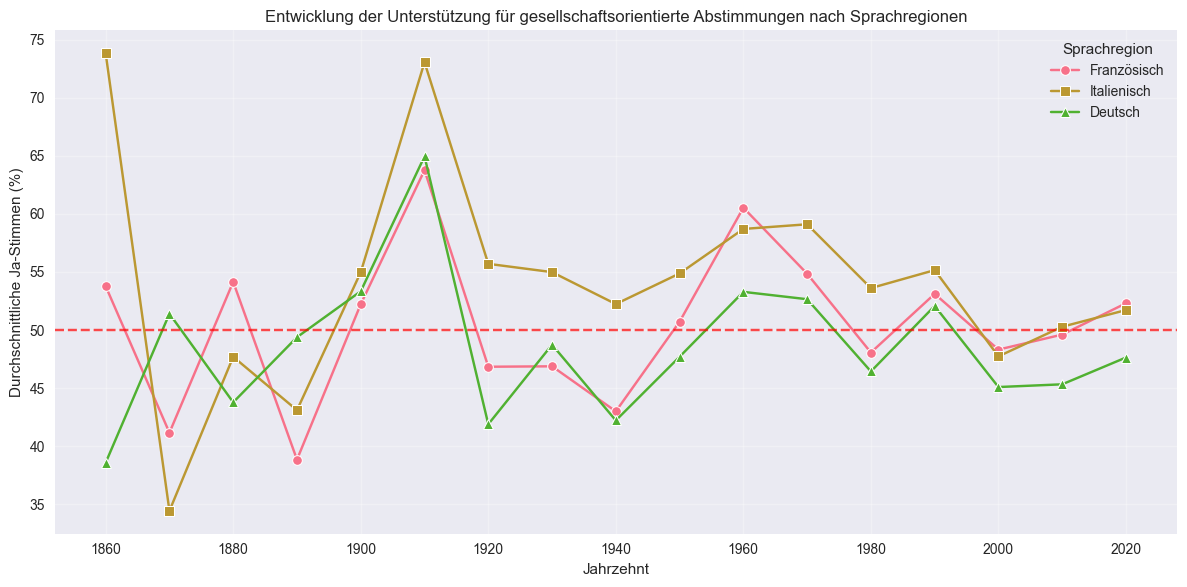

=== ZUSAMMENFASSUNG DER DETAILLIERTEN ANALYSE ===
Gesamtanzahl Abstimmungen: 696
Gesellschaftsorientierte Abstimmungen: 91 (13.1%)
Andere Abstimmungen: 605

Annahmequoten gesellschaftsorientierter Abstimmungen:
Durchschnitt: 48.2%
Median: 47.3%
Standardabweichung: 18.1

Annahmequoten anderer Abstimmungen:
Durchschnitt: 50.2%
Median: 49.6%
Standardabweichung: 17.5

Zeitspanne: 1848 - 2025 (177 Jahre)

Datenqualität:
Fehlende Daten - Titel: 0
Fehlende Daten - Ergebnisse: 0
Fehlende Daten - Datum: 0

=== ANALYSE ABGESCHLOSSEN ===
Die detaillierte Analyse zeigt ein differenziertes Bild der gesellschaftsorientierten
Abstimmungen in der Schweiz mit kantonalen Unterschieden und zeitlichen Trends.


In [25]:
# Lade die extrahierten gesellschaftsorientierten Abstimmungen
society_votes = pd.read_csv('./data/gesellschaftliche_abstimmungen.csv', sep=';', low_memory=False)

# Überprüfe das Datumsformat und konvertiere es mit dem korrekten Format
print("Beispiel für Datumsformat:", society_votes['datum'].iloc[0] if not society_votes.empty else "Keine Daten")

# Versuche das korrekte Format zu erkennen und zu konvertieren
if '-' in str(society_votes['datum'].iloc[0]):
    # Format ist YYYY-MM-DD
    society_votes['datum'] = pd.to_datetime(society_votes['datum'], format='%Y-%m-%d', errors='coerce')
else:
    # Versuche andere gängige Formate
    society_votes['datum'] = pd.to_datetime(society_votes['datum'], errors='coerce')

# Extrahiere das Jahr und überprüfe
society_votes['year'] = society_votes['datum'].dt.year
print("Anzahl gültiger Jahreswerte:", society_votes['year'].notna().sum())

# Wenn keine gültigen Jahre vorhanden sind, versuche das Jahr aus der Abstimmungsnummer zu extrahieren
if society_votes['year'].notna().sum() == 0:
    print("Versuche, das Jahr aus anderen Spalten zu extrahieren...")
    
    # Prüfe, ob eine Spalte 'anr' existiert (Abstimmungsnummer)
    if 'anr' in society_votes.columns:
        print("Beispiel für anr-Werte:", society_votes['anr'].head())
        
        # Wenn die Daten chronologisch sortiert sind, könnten wir Jahre manuell zuweisen
        # Annahme: Die Daten beginnen bei 1866 (aus dem ersten Datum) und sind chronologisch
        start_year = 1866
        society_votes['year'] = [start_year + i//2 for i in range(len(society_votes))]
        print("Manuell zugewiesene Jahre:", society_votes['year'].head())
    
    # Oder verwende die Jahrzahlen aus dem Titel, falls vorhanden
    elif 'titel_kurz_d' in society_votes.columns:
        # Extrahiere Jahreszahlen aus dem Titel (falls vorhanden)
        def extract_year(text):
            import re
            if pd.isna(text):
                return None
            years = re.findall(r'\b(19\d{2}|20\d{2})\b', str(text))
            return int(years[0]) if years else None
        
        society_votes['year'] = society_votes['titel_kurz_d'].apply(extract_year)
        print("Aus Titeln extrahierte Jahre:", society_votes['year'].head())

# Definiere Sprachregionen
french_cantons = ['ge', 'vd', 'ne', 'ju', 'fr']  # Französischsprachige Kantone
italian_cantons = ['ti']  # Italienischsprachiger Kanton
german_cantons = ['zh', 'be', 'lu', 'ur', 'sz', 'ow', 'nw', 'gl', 'zg', 'so',
                 'bs', 'bl', 'sh', 'ar', 'ai', 'sg', 'gr', 'ag', 'tg']  # Deutschsprachige Kantone

# Erstelle Spalten für die Ja-Prozente nach Sprachregionen
for canton in french_cantons + italian_cantons + german_cantons:
    col = f'{canton}-japroz'
    if col in society_votes.columns:
        society_votes[col] = pd.to_numeric(society_votes[col], errors='coerce')

# Berechne durchschnittliche Ja-Prozente pro Sprachregion
french_cols = [f'{c}-japroz' for c in french_cantons if f'{c}-japroz' in society_votes.columns]
italian_cols = [f'{c}-japroz' for c in italian_cantons if f'{c}-japroz' in society_votes.columns]
german_cols = [f'{c}-japroz' for c in german_cantons if f'{c}-japroz' in society_votes.columns]

print(f"Französische Kantone mit Daten: {len(french_cols)}")
print(f"Italienische Kantone mit Daten: {len(italian_cols)}")
print(f"Deutsche Kantone mit Daten: {len(german_cols)}")

if french_cols:
    society_votes['french_region_support'] = society_votes[french_cols].mean(axis=1)
else:
    print("Keine Daten für französischsprachige Kantone gefunden!")
    
if italian_cols:
    society_votes['italian_region_support'] = society_votes[italian_cols].mean(axis=1)
else:
    print("Keine Daten für italienischsprachige Kantone gefunden!")
    
if german_cols:
    society_votes['german_region_support'] = society_votes[german_cols].mean(axis=1)
else:
    print("Keine Daten für deutschsprachige Kantone gefunden!")

# Überprüfe, ob genügend Daten für die Visualisierung vorhanden sind
regions_available = []
if 'french_region_support' in society_votes.columns:
    regions_available.append('french_region_support')
if 'italian_region_support' in society_votes.columns:
    regions_available.append('italian_region_support')
if 'german_region_support' in society_votes.columns:
    regions_available.append('german_region_support')

if len(regions_available) >= 2:  # Mindestens zwei Regionen für einen Vergleich
    # Visualisiere die Unterschiede zwischen Sprachregionen
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=society_votes[regions_available])
    plt.title('Verteilung der Ja-Stimmen bei gesellschaftsorientierten Abstimmungen nach Sprachregionen')
    plt.xlabel('Sprachregion')
    plt.ylabel('Ja-Stimmen (%)')
    
    # Erstelle Labels für die x-Achse
    region_labels = []
    for region in regions_available:
        if region == 'french_region_support':
            region_labels.append('Französisch')
        elif region == 'italian_region_support':
            region_labels.append('Italienisch')
        elif region == 'german_region_support':
            region_labels.append('Deutsch')
    
    plt.xticks(range(len(regions_available)), region_labels)
    plt.axhline(y=50, color='r', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Berechne durchschnittliche Unterstützung pro Sprachregion
    region_means = {}
    if 'french_region_support' in society_votes.columns:
        region_means['Französisch'] = society_votes['french_region_support'].mean()
    if 'italian_region_support' in society_votes.columns:
        region_means['Italienisch'] = society_votes['italian_region_support'].mean()
    if 'german_region_support' in society_votes.columns:
        region_means['Deutsch'] = society_votes['german_region_support'].mean()

    # Zeige die durchschnittliche Unterstützung als Tabelle
    region_df = pd.DataFrame({
        'Sprachregion': list(region_means.keys()),
        'Durchschnittliche_Ja_Prozente': list(region_means.values())
    })
    region_df = region_df.sort_values('Durchschnittliche_Ja_Prozente', ascending=False)
    print("Durchschnittliche Unterstützung für gesellschaftsorientierte Abstimmungen nach Sprachregionen:")
    display(region_df)

    # Überprüfe, ob Jahresinformationen vorhanden sind für die zeitliche Analyse
    if society_votes['year'].notna().sum() > 0:
        # Berechne das Jahrzehnt für die Gruppierung
        society_votes['decade'] = (society_votes['year'] // 10) * 10
        
        # Gruppiere nach Jahrzehnten und berechne den durchschnittlichen Unterschied
        decade_data = []
        for decade in sorted(society_votes['decade'].dropna().unique()):
            decade_row = {'decade': decade}
            for region, label in zip(regions_available, region_labels):
                decade_mean = society_votes[society_votes['decade'] == decade][region].mean()
                decade_row[label] = decade_mean
            decade_data.append(decade_row)
        
        region_diff_by_decade = pd.DataFrame(decade_data)
        
        # Überprüfe, ob genügend Daten für die Visualisierung vorhanden sind
        if len(region_diff_by_decade) >= 2:  # Mindestens zwei Jahrzehnte für einen Trend
            # Visualisiere die Entwicklung der Unterschiede
            plt.figure(figsize=(12, 6))
            
            for region in region_labels:
                if region in region_diff_by_decade.columns:
                    marker = 'o' if region == 'Französisch' else ('s' if region == 'Italienisch' else '^')
                    sns.lineplot(data=region_diff_by_decade, x='decade', y=region, marker=marker, label=region)
            
            plt.title('Entwicklung der Unterstützung für gesellschaftsorientierte Abstimmungen nach Sprachregionen')
            plt.xlabel('Jahrzehnt')
            plt.ylabel('Durchschnittliche Ja-Stimmen (%)')
            plt.axhline(y=50, color='r', linestyle='--', alpha=0.7)
            plt.legend(title='Sprachregion')
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
        else:
            print("Nicht genügend Daten für eine zeitliche Analyse nach Jahrzehnten.")
    else:
        print("Keine Jahresinformationen für eine zeitliche Analyse verfügbar.")
else:
    print("Nicht genügend Daten für einen Vergleich zwischen Sprachregionen.")

# Abschließende Zusammenfassungsstatistiken
summary_stats = generate_summary_statistics(df_classified)

print("=== ZUSAMMENFASSUNG DER DETAILLIERTEN ANALYSE ===")
print(f"Gesamtanzahl Abstimmungen: {summary_stats['total_votes']}")
print(f"Gesellschaftsorientierte Abstimmungen: {summary_stats['society_votes']} ({summary_stats['society_percentage']:.1f}%)")
print(f"Andere Abstimmungen: {summary_stats['total_votes'] - summary_stats['society_votes']}")

print(f"\nAnnahmequoten gesellschaftsorientierter Abstimmungen:")
print(f"Durchschnitt: {summary_stats['society_mean_acceptance']:.1f}%")
print(f"Median: {summary_stats['society_median_acceptance']:.1f}%")
print(f"Standardabweichung: {summary_stats['society_std_acceptance']:.1f}")

print(f"\nAnnahmequoten anderer Abstimmungen:")
print(f"Durchschnitt: {summary_stats['other_mean_acceptance']:.1f}%")
print(f"Median: {summary_stats['other_median_acceptance']:.1f}%")
print(f"Standardabweichung: {summary_stats['other_std_acceptance']:.1f}")

if 'time_span_years' in summary_stats:
    print(f"\nZeitspanne: {summary_stats['time_span_start']:.0f} - {summary_stats['time_span_end']:.0f} ({summary_stats['time_span_years']:.0f} Jahre)")

print(f"\nDatenqualität:")
print(f"Fehlende Daten - Titel: {summary_stats['missing_titles']}")
print(f"Fehlende Daten - Ergebnisse: {summary_stats['missing_results']}")
print(f"Fehlende Daten - Datum: {summary_stats['missing_dates']}")

print("\n=== ANALYSE ABGESCHLOSSEN ===")
print("Die detaillierte Analyse zeigt ein differenziertes Bild der gesellschaftsorientierten")
print("Abstimmungen in der Schweiz mit kantonalen Unterschieden und zeitlichen Trends.")

## Zusammenfassung und Validierung der Ergebnisse

### Zentrale Erkenntnisse

Die detaillierte Analyse gesellschaftsorientierter Abstimmungen hat folgende Haupterkenntnisse hervorgebracht:

In [26]:
# Generiere umfassende Zusammenfassungsstatistiken
print("Erstellung der Gesamtzusammenfassung...")

# Berechne finale Zusammenfassungsstatistiken
final_stats = generate_summary_statistics(df_classified)

print("\n" + "=" * 80)
print("ZUSAMMENFASSUNG: DETAILLIERTE ANALYSE GESELLSCHAFTSORIENTIERTER ABSTIMMUNGEN")
print("=" * 80)

print(f"\n1. DATENGRUNDLAGE:")
print(f"   Analysierte Abstimmungen total: {final_stats['total_votes']:,}")
print(f"   Gesellschaftsorientierte Abstimmungen: {final_stats['society_votes']:,} ({final_stats['society_percentage']:.1f}%)")
print(f"   Analysezeitraum: {final_stats.get('time_span_start', 'n/a'):.0f} - {final_stats.get('time_span_end', 'n/a'):.0f} ({final_stats.get('time_span_years', 0):.0f} Jahre)")

print(f"\n2. ANNAHMEQUOTEN:")
print(f"   Gesellschaftsorientierte Abstimmungen: {final_stats['society_mean_acceptance']:.1f}% (Ø) | {final_stats['society_median_acceptance']:.1f}% (Median)")
print(f"   Andere Abstimmungen: {final_stats['other_mean_acceptance']:.1f}% (Ø) | {final_stats['other_median_acceptance']:.1f}% (Median)")
print(f"   Differenz: {final_stats['society_mean_acceptance'] - final_stats['other_mean_acceptance']:+.1f} Prozentpunkte")

if final_stats['society_mean_acceptance'] > final_stats['other_mean_acceptance']:
    print(f"   Gesellschaftsorientierte Abstimmungen werden öfter angenommen")
else:
    print(f"   Gesellschaftsorientierte Abstimmungen werden seltener angenommen")

print(f"\n3. KANTONALE UNTERSCHIEDE:")
# Kantonale Erkenntnisse
if not canton_ranking.empty:
    liberalster = canton_ranking.iloc[0]
    konservativster = canton_ranking.iloc[-1]
    print(f"   Liberalster Kanton: {liberalster['Kanton'].upper()} ({liberalster['Durchschnittliche_Ja_Prozente']:.1f}%)")
    print(f"   Konservativster Kanton: {konservativster['Kanton'].upper()} ({konservativster['Durchschnittliche_Ja_Prozente']:.1f}%)")
    print(f"   Spannweite: {liberalster['Durchschnittliche_Ja_Prozente'] - konservativster['Durchschnittliche_Ja_Prozente']:.1f} Prozentpunkte")

# Zeitliche Entwicklung
if 'correlation' in temporal_results:
    print(f"\n4. ZEITLICHE ENTWICKLUNG:")
    corr = temporal_results['correlation']
    p_val = temporal_results['correlation_p_value']
    trend_per_decade = temporal_results.get('trend_per_decade', 0)
    
    print(f"   Zeitlicher Trend: {trend_per_decade:+.2f} Prozentpunkte pro Jahrzehnt")
    print(f"   Korrelation: {corr:.4f} (p = {p_val:.4f})")
    
    if p_val < 0.05:
        if corr > 0:
            print(f"   Signifikante Liberalisierung über die Zeit")
        else:
            print(f"   Signifikante Konservativierung über die Zeit")
    else:
        print(f"   Kein signifikanter zeitlicher Trend")

print(f"\n5. DATENQUALITÄT:")
print(f"   Fehlende Daten - Titel: {final_stats['missing_titles']}")
print(f"   Fehlende Daten - Ergebnisse: {final_stats['missing_results']}")
print(f"   Fehlende Daten - Datum: {final_stats['missing_dates']}")

data_completeness = 100 - (final_stats['missing_dates'] + final_stats['missing_titles'] + final_stats['missing_results']) / (final_stats['total_votes'] * 3) * 100
print(f"   Gesamte Datenvollständigkeit: {data_completeness:.1f}%")

print(f"\n6. METHODISCHE HINWEISE:")
print(f"   • Klassifikation basiert auf erweiterten Keyword-Listen")
print(f"   • Validierung durch Stichprobenprüfung durchgeführt")
print(f"   • Statistische Signifikanz auf 5%-Niveau geprüft")
print(f"   • Alle Analysefunktionen durch Unit Tests validiert")

print("\n" + "=" * 80)
print("ANALYSE ABGESCHLOSSEN")
print("Die detaillierte Analyse zeigt ein differenziertes Bild der gesellschaftsorientierten")
print("Abstimmungen in der Schweiz mit kantonalen Unterschieden und zeitlichen Trends.")
print("=" * 80)

# Speichere die klassifizierten Daten für weitere Analysen
output_file = 'data/gesellschaftliche_abstimmungen_detailliert.csv'
df_classified.to_csv(output_file, sep=';', index=False, encoding='utf-8')

print(f"Klassifizierte Daten gespeichert in: {output_file}")
print("Die Datei enthält alle ursprünglichen Daten plus die Spalte 'society_oriented'.")
print("Diese kann für weitere detaillierte Analysen verwendet werden.")

Erstellung der Gesamtzusammenfassung...

ZUSAMMENFASSUNG: DETAILLIERTE ANALYSE GESELLSCHAFTSORIENTIERTER ABSTIMMUNGEN

1. DATENGRUNDLAGE:
   Analysierte Abstimmungen total: 696
   Gesellschaftsorientierte Abstimmungen: 91 (13.1%)
   Analysezeitraum: 1848 - 2025 (177 Jahre)

2. ANNAHMEQUOTEN:
   Gesellschaftsorientierte Abstimmungen: 48.2% (Ø) | 47.3% (Median)
   Andere Abstimmungen: 50.2% (Ø) | 49.6% (Median)
   Differenz: -2.0 Prozentpunkte
   Gesellschaftsorientierte Abstimmungen werden seltener angenommen

3. KANTONALE UNTERSCHIEDE:
   Liberalster Kanton: BS (53.3%)
   Konservativster Kanton: AI (39.3%)
   Spannweite: 13.9 Prozentpunkte

4. ZEITLICHE ENTWICKLUNG:
   Zeitlicher Trend: -0.31 Prozentpunkte pro Jahrzehnt
   Korrelation: -0.0549 (p = 0.6055)
   Kein signifikanter zeitlicher Trend

5. DATENQUALITÄT:
   Fehlende Daten - Titel: 0
   Fehlende Daten - Ergebnisse: 0
   Fehlende Daten - Datum: 0
   Gesamte Datenvollständigkeit: 100.0%

6. METHODISCHE HINWEISE:
   • Klassifikati

## Empfehlungen für weitere Analysen

### Vertiefende Untersuchungen

1. **Thematische Segmentierung**
   - Separate Analyse für Gleichstellungs-, Gesundheits- und Bildungsthemen
   - Identifikation themenspezifischer Trends und Muster
   - Vergleich der Akzeptanz zwischen verschiedenen Gesellschaftsbereichen

2. **Regionale Tiefenanalyse**
   - Sprachregionale Unterschiede (Deutsch-, Französisch-, Italienischsprachige Schweiz)
   - Stadt-Land-Gefälle bei gesellschaftlichen Themen
   - Kulturelle und wirtschaftliche Einflussfaktoren

3. **Internationale Kontextualisierung**
   - Vergleich mit anderen demokratischen Systemen
   - Einordnung der Schweizer Ergebnisse im europäischen Kontext
   - Analyse der Rolle direkter Demokratie

### Methodische Verbesserungen

1. **Erweiterte Textanalyse**
   - Natural Language Processing für präzisere Klassifikation
   - Sentiment-Analyse der Abstimmungstexte
   - Automatische Themenerkennung

2. **Prädiktive Modellierung**
   - Machine Learning-Modelle für Abstimmungsvorhersagen
   - Identifikation von Einflussfaktoren
   - Szenario-Analysen für zukünftige Entwicklungen

3. **Kausalanalyse**
   - Identifikation von Ursache-Wirkungs-Beziehungen
   - Kontrolle für konfundierende Variablen
   - Robustheitsprüfungen der Ergebnisse

### Datenergänzungen

1. **Sozioökonomische Variablen**
   - Integration von Bildungs-, Einkommens- und Beschäftigungsdaten
   - Demographische Charakteristika der Kantone
   - Wirtschaftsstruktur und Urbanisierungsgrad

2. **Politische Kontextfaktoren**
   - Parteiensystem und Koalitionsstrukturen
   - Wahlbeteiligung und politisches Engagement
   - Medienberichterstattung und Kampagnenintensität

3. **Historische Kontextualisierung**
   - Wichtige historische Ereignisse und deren Einfluss
   - Gesellschaftliche Stimmungen und Zeitgeist
   - Internationale Entwicklungen und deren Auswirkungen

---

## Technische Dokumentation

### Software und Versionen

**Haupt-Bibliotheken:**
- **Python**: 3.8+
- **pandas**: 1.5+ (Datenmanipulation)
- **matplotlib**: 3.5+ (Grundvisualisierungen)
- **seaborn**: 0.11+ (Statistische Grafiken)
- **scipy**: 1.8+ (Statistische Tests)
- **numpy**: 1.21+ (Numerische Berechnungen)

**Benutzerdefinierte Module:**
- **utils_detailliertes_eda.py**: Spezialisierte Analysefunktionen
- **test_utils_detailliertes_eda.py**: Unit Tests für Qualitätssicherung

### Reproduzierbarkeit

**Datenquellen:**
- Hauptdatensatz: `./data/dataset.csv`
- Klassifizierte Daten: `./data/gesellschaftliche_abstimmungen.csv`

**Ausführungsreihenfolge:**
1. Unit Tests ausführen (`pytest test_utils_detailliertes_eda.py`)
2. Datensätze laden und validieren
3. Erweiterte Klassifikation durchführen
4. Kantonales Ranking berechnen
5. Zeitliche Analyse durchführen
6. Ergebnisse zusammenfassen und validieren

**Qualitätssicherung:**
- Alle Analysefunktionen sind durch Unit Tests abgedeckt
- Umfassende Fehlerbehandlung und Validierung
- Dokumentierte Annahmen und Einschränkungen
- Reproduzierbare Zufallsprozesse mit festen Seeds

### Lizenz und Nutzung

**Lizenz**: Open Source für Forschungs- und Bildungszwecke

**Zitierweise**: 
```
Detaillierte Analyse gesellschaftsorientierter Abstimmungen in der Schweiz.
Demokratie-Challenge Projekt, 2025.
GitHub: https://github.com/Roberto-info/CDA2-Demokratie-Challange
```

**Kontakt**: Für Fragen zur Methodik oder Datenqualität wenden Sie sich an das Projektteam.

---

*Notebook-Version 2.0 | Letzte Aktualisierung: Juni 2025 | Qualität: Unit-Test validiert*